In [9]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# basic imports 
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Build dataset

In [10]:
from proj1_helpers import load_csv_data 
from outliers import handle_outliers
from standard import standardize

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

# handle outliers
X0, y = handle_outliers(input_data_raw, y_raw, -999, True)

# standardize
X0, mean_X0, std_X0 = standardize(X0)

# set y in {0,1} instead of {-1,1}
y[np.where(y==-1)]=0

samples with -999 are removed from the dataset 


In [11]:
# choose the features
ind_features = [1, 13, 4, 11, 7, 2, 16, 10, 19, 12, 23, 5, 8, 26, 21, 22, 0, 9]
X = X0#[:, ind_features]
print(X.shape)

(68114, 30)


# Fix gamma manually (check for convergence when the degre is low or high)

In [16]:
from build_poly import build_poly
from implementations import logistic_regression

# model
arg_lr = dict()
arg_lr['method'] = 'lr'
arg_lr['loss'] = 'loglikelihood'

# build polynomial basis function
degree = 10
phi0 = build_poly(X, degree)

# standardize the degree > 1
phi = phi0
phi[:, 1:],_ ,_ = standardize(phi[:, 1:])

# optimization params
arg_lr['gamma'] = 1e-5
arg_lr['method_minimization'] = 'gd' # 'gd' (gradient_descent) or 'newton'
arg_lr['initial_w'] = np.zeros(phi.shape[1])
arg_lr['max_iters'] = 50000
arg_lr['threshold'] = 10
arg_lr['debug_mode'] = 1

n_iter: 50 , ||grad|| = 1811.96182055


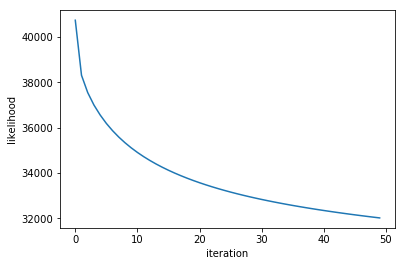

n_iter: 100 , ||grad|| = 1159.81856463


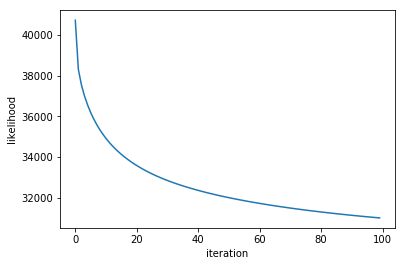

n_iter: 150 , ||grad|| = 879.372860091


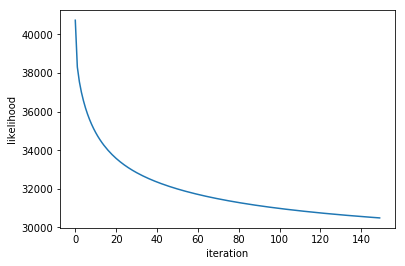

n_iter: 200 , ||grad|| = 715.946317649


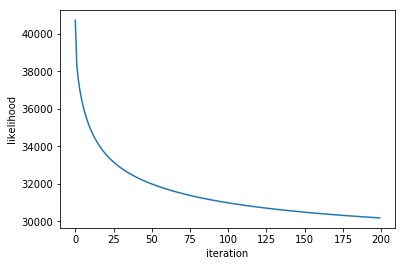

n_iter: 250 , ||grad|| = 607.480440134


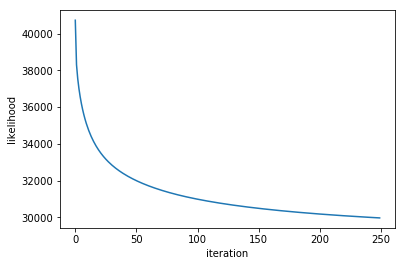

n_iter: 300 , ||grad|| = 530.340134072


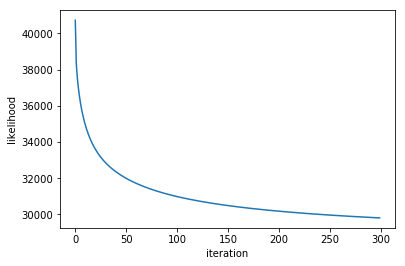

n_iter: 350 , ||grad|| = 473.098836391


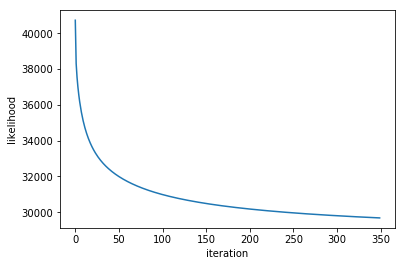

n_iter: 400 , ||grad|| = 428.387375041


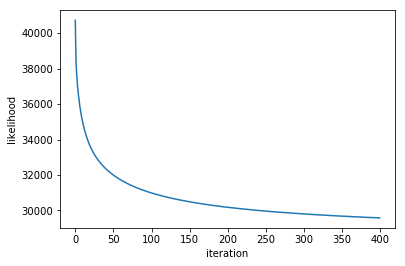

n_iter: 450 , ||grad|| = 391.382722319


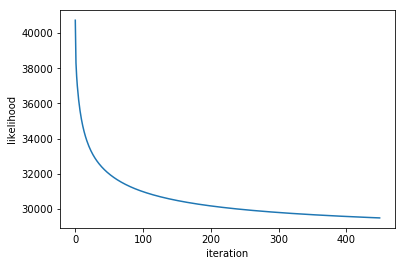

n_iter: 500 , ||grad|| = 361.880046696


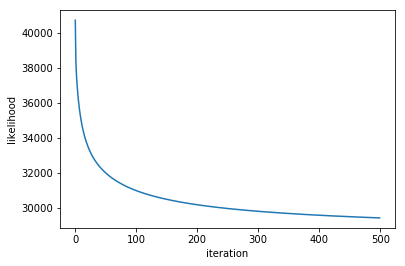

n_iter: 550 , ||grad|| = 338.648181932


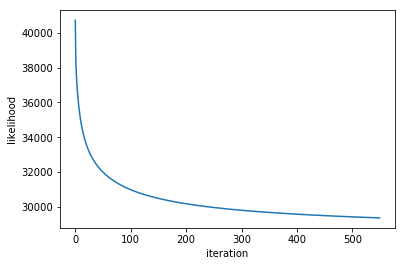

n_iter: 600 , ||grad|| = 319.618072157


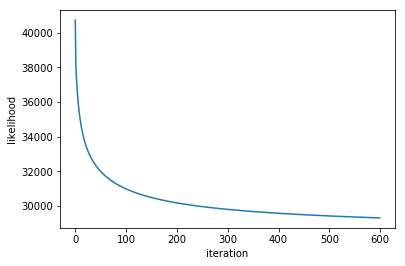

n_iter: 650 , ||grad|| = 303.84592192


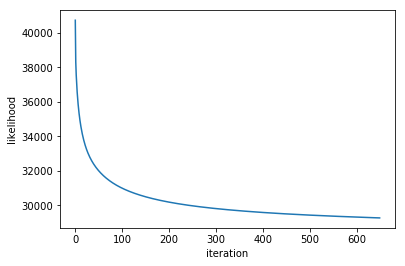

n_iter: 700 , ||grad|| = 290.648972389


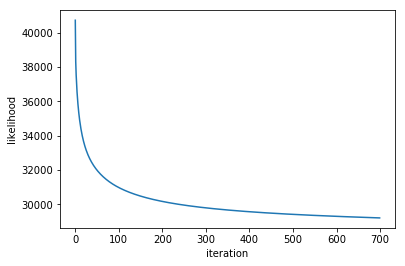

n_iter: 750 , ||grad|| = 279.506389811


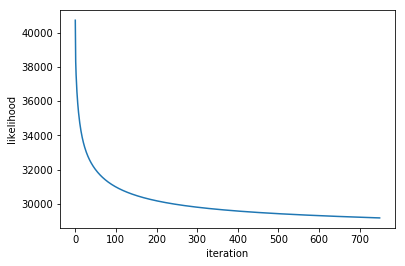

n_iter: 800 , ||grad|| = 270.013534218


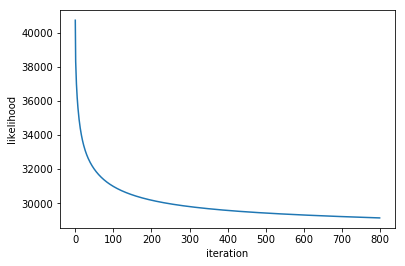

n_iter: 850 , ||grad|| = 261.853056241


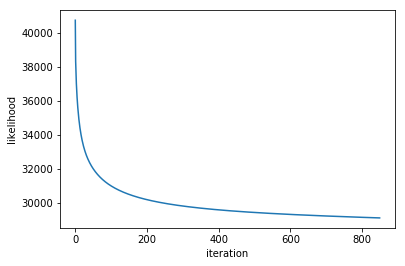

n_iter: 900 , ||grad|| = 254.774475318


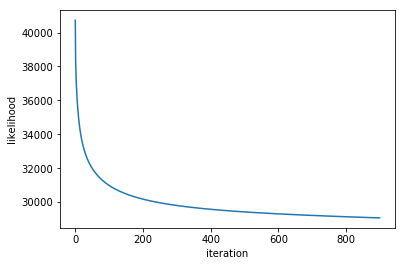

n_iter: 950 , ||grad|| = 248.578722388


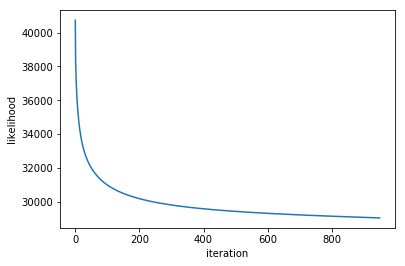

n_iter: 1000 , ||grad|| = 243.105525547


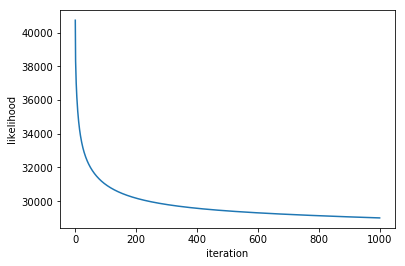

n_iter: 1050 , ||grad|| = 238.221444849


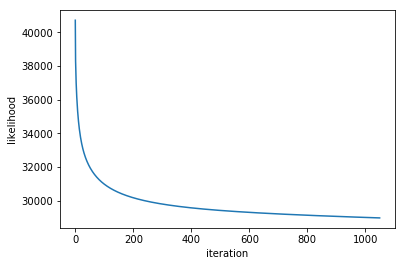

n_iter: 1100 , ||grad|| = 233.805166504


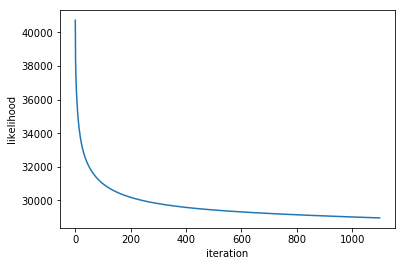

n_iter: 1150 , ||grad|| = 229.724445126


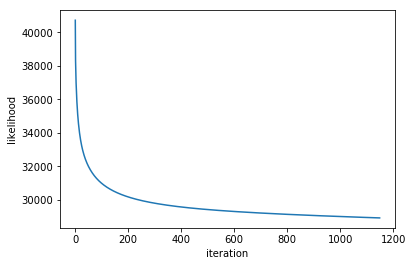

n_iter: 1200 , ||grad|| = 225.788742813


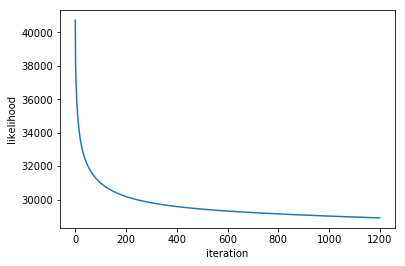

n_iter: 1250 , ||grad|| = 221.324037608


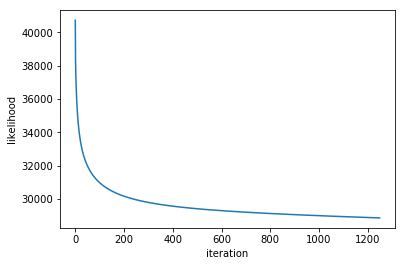

n_iter: 1300 , ||grad|| = 214.763715701


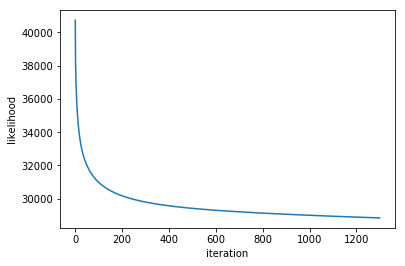

n_iter: 1350 , ||grad|| = 207.011200511


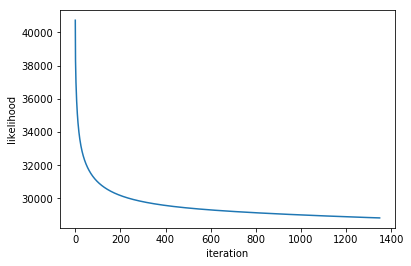

n_iter: 1400 , ||grad|| = 199.557305487


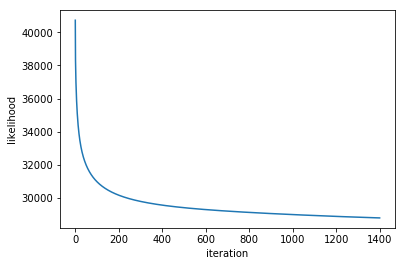

n_iter: 1450 , ||grad|| = 193.357911483


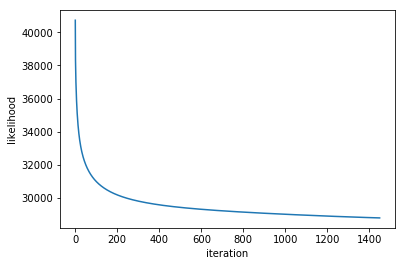

n_iter: 1500 , ||grad|| = 188.3232073


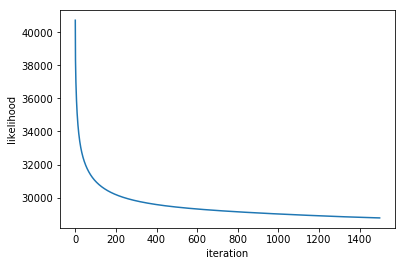

n_iter: 1550 , ||grad|| = 184.084986932


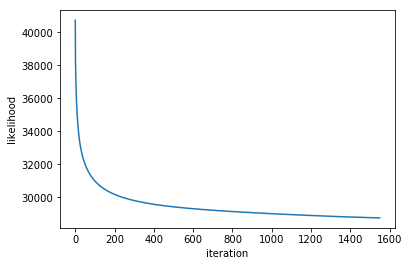

n_iter: 1600 , ||grad|| = 180.37090914


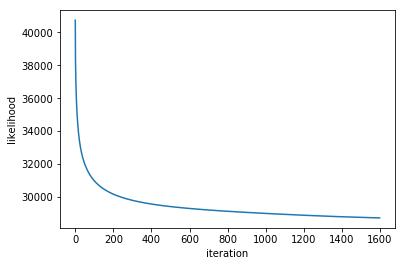

n_iter: 1650 , ||grad|| = 177.015319403


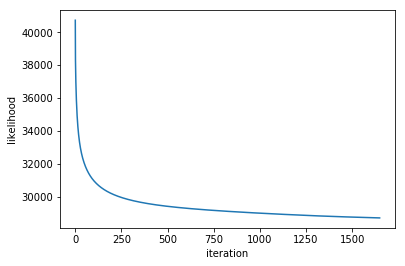

n_iter: 1700 , ||grad|| = 173.90979772


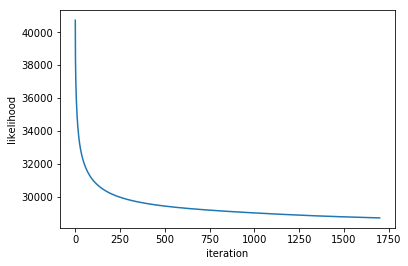

n_iter: 1750 , ||grad|| = 170.972992726


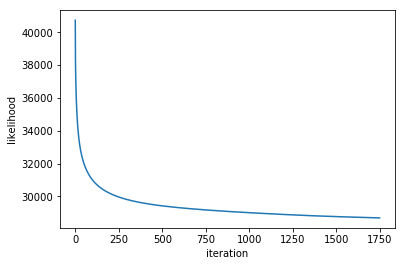

n_iter: 1800 , ||grad|| = 168.145725858


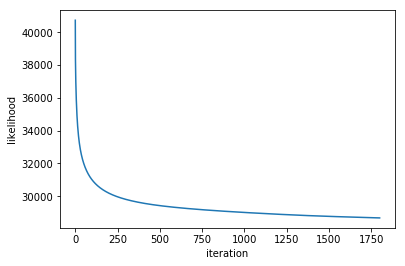

n_iter: 1850 , ||grad|| = 165.403746369


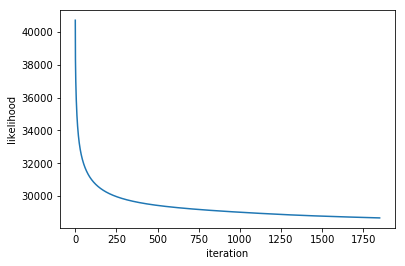

n_iter: 1900 , ||grad|| = 162.763973355


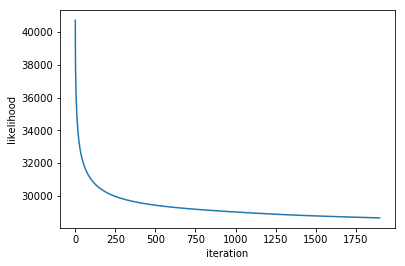

n_iter: 1950 , ||grad|| = 160.261024511


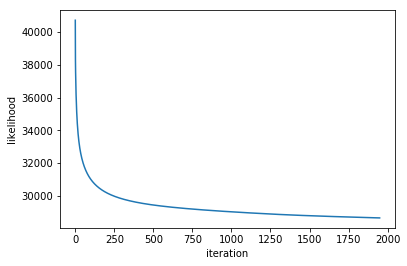

n_iter: 2000 , ||grad|| = 157.915608637


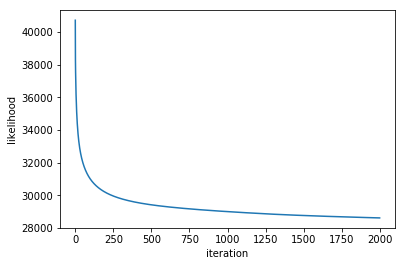

n_iter: 2050 , ||grad|| = 155.727071338


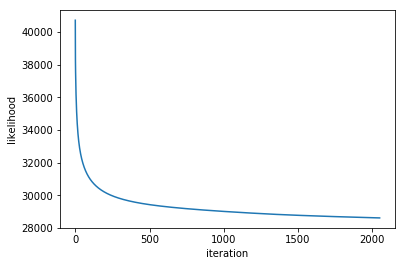

n_iter: 2100 , ||grad|| = 153.6832527


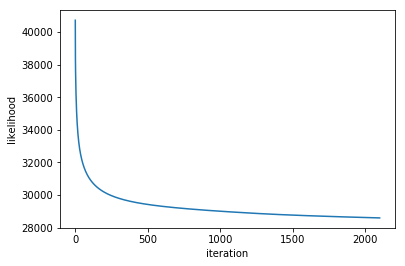

n_iter: 2150 , ||grad|| = 151.769265715


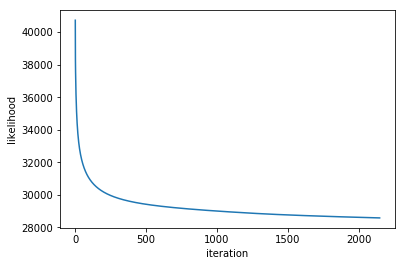

n_iter: 2200 , ||grad|| = 149.970779013


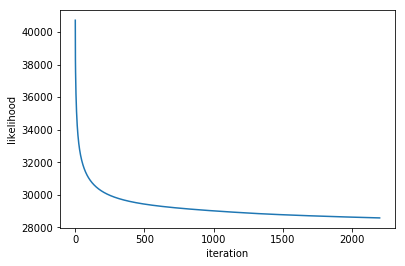

n_iter: 2250 , ||grad|| = 148.274196462


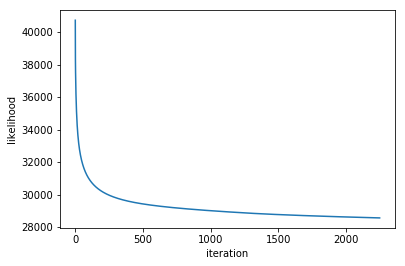

n_iter: 2300 , ||grad|| = 146.665557726


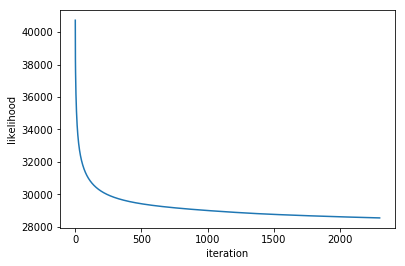

n_iter: 2350 , ||grad|| = 145.131209202


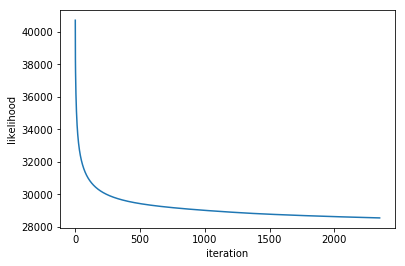

n_iter: 2400 , ||grad|| = 143.667151154


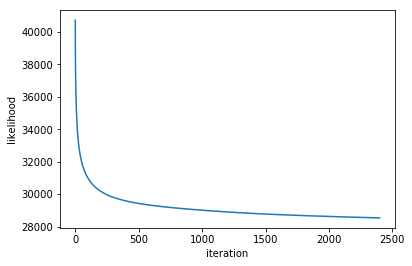

n_iter: 2450 , ||grad|| = 142.277951592


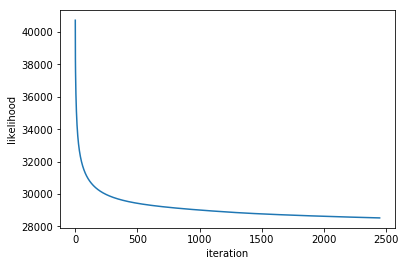

n_iter: 2500 , ||grad|| = 140.956484232


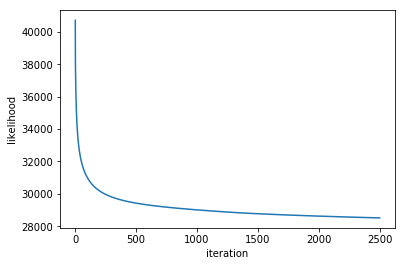

n_iter: 2550 , ||grad|| = 139.691553585


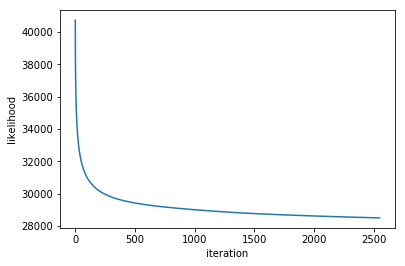

n_iter: 2600 , ||grad|| = 138.475178305


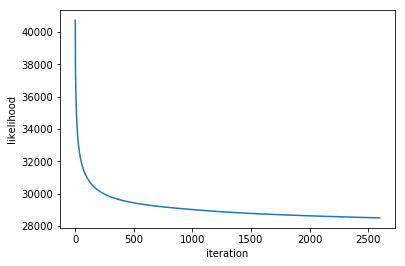

n_iter: 2650 , ||grad|| = 137.301208267


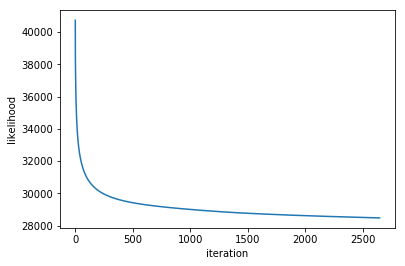

n_iter: 2700 , ||grad|| = 136.164398958


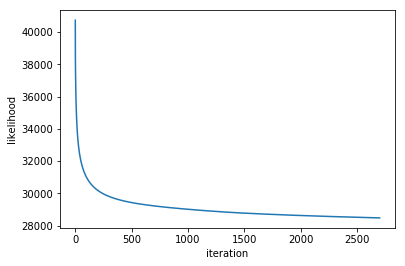

n_iter: 2750 , ||grad|| = 135.060183738


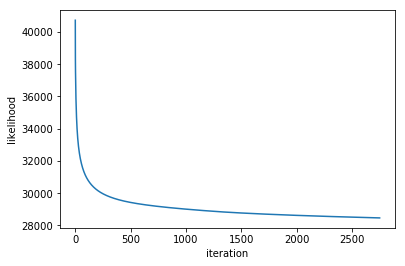

n_iter: 2800 , ||grad|| = 133.984637886


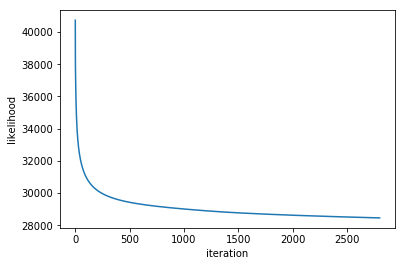

n_iter: 2850 , ||grad|| = 132.934488983


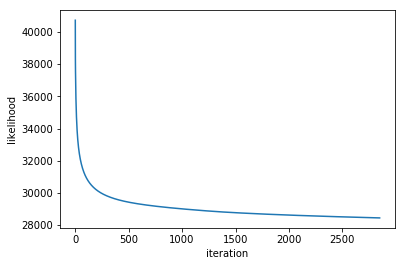

n_iter: 2900 , ||grad|| = 131.907114976


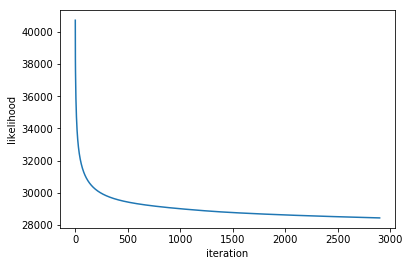

n_iter: 2950 , ||grad|| = 130.900492238


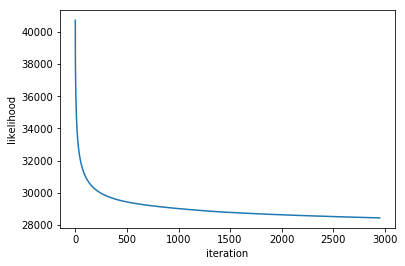

n_iter: 3000 , ||grad|| = 129.913076249


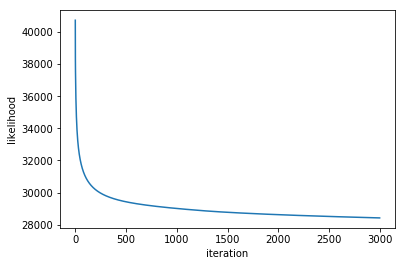

n_iter: 3050 , ||grad|| = 128.943624918


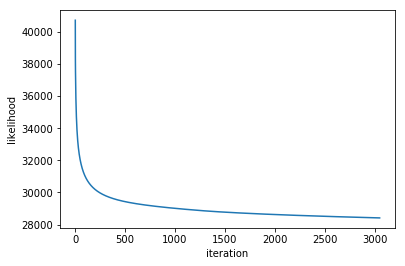

n_iter: 3100 , ||grad|| = 127.991000785


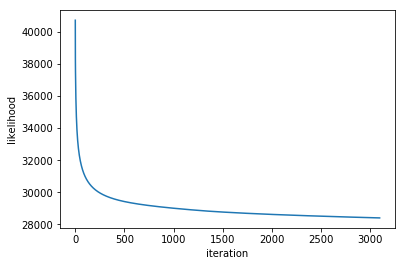

n_iter: 3150 , ||grad|| = 127.054001317


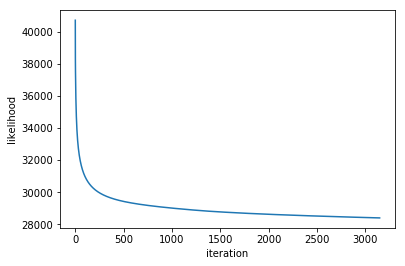

n_iter: 3200 , ||grad|| = 126.131259094


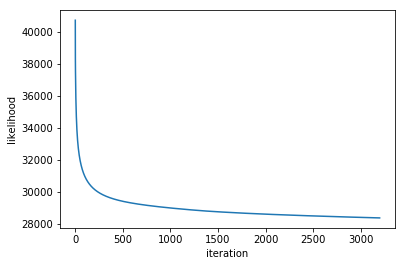

n_iter: 3250 , ||grad|| = 125.22122939


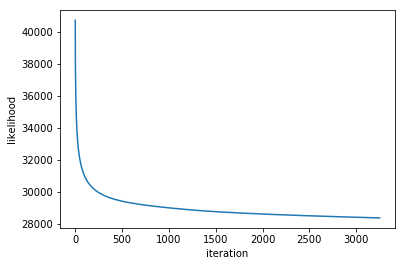

n_iter: 3300 , ||grad|| = 124.322253695


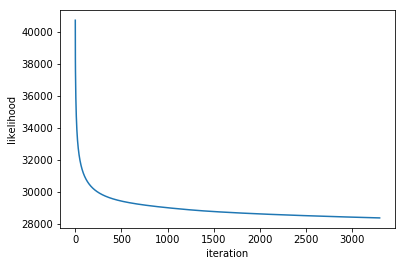

n_iter: 3350 , ||grad|| = 123.432667425


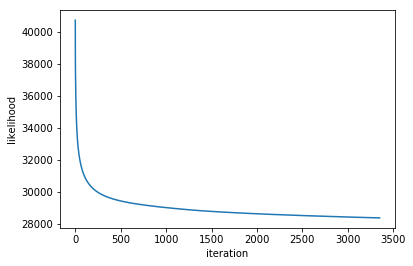

n_iter: 3400 , ||grad|| = 122.550914716


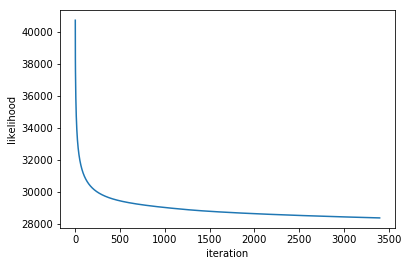

n_iter: 3450 , ||grad|| = 121.675640285


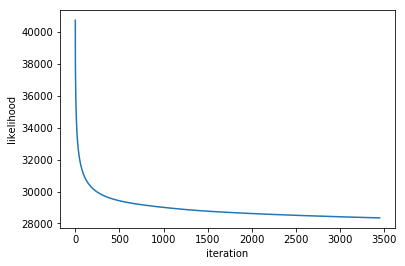

n_iter: 3500 , ||grad|| = 120.805739315


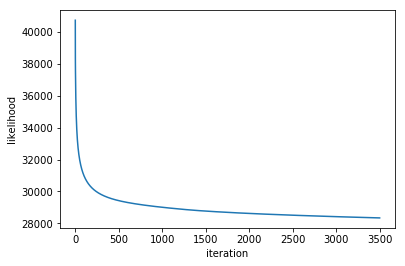

n_iter: 3550 , ||grad|| = 119.940349215


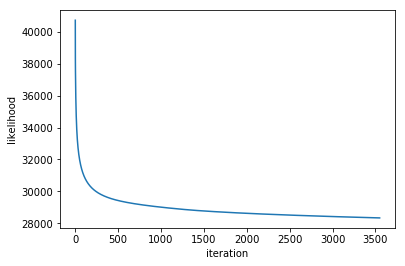

n_iter: 3600 , ||grad|| = 119.078739644


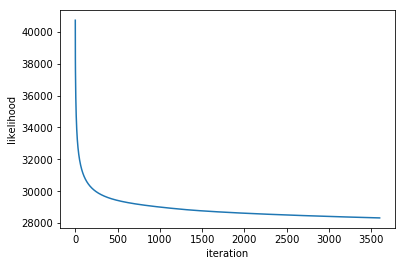

n_iter: 3650 , ||grad|| = 118.21994322


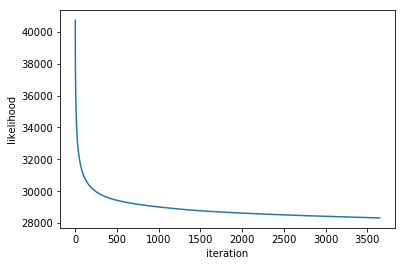

n_iter: 3700 , ||grad|| = 117.361704276


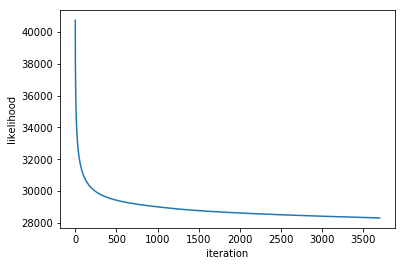

n_iter: 3750 , ||grad|| = 116.498798499


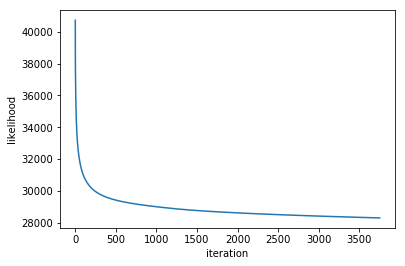

n_iter: 3800 , ||grad|| = 115.62725111


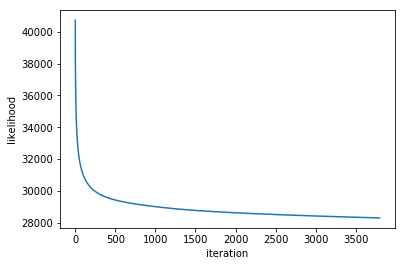

n_iter: 3850 , ||grad|| = 114.758389914


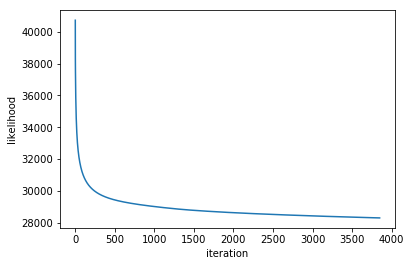

n_iter: 3900 , ||grad|| = 113.903390652


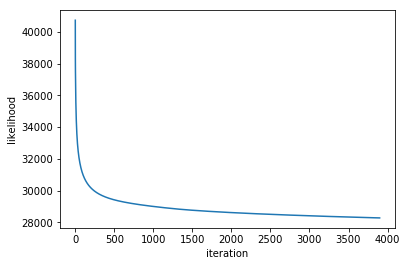

n_iter: 3950 , ||grad|| = 113.05998663


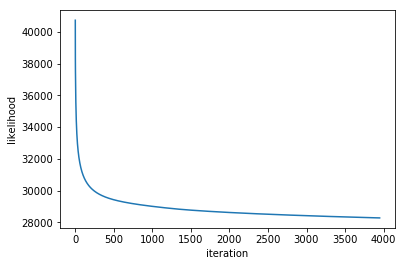

n_iter: 4000 , ||grad|| = 112.225225546


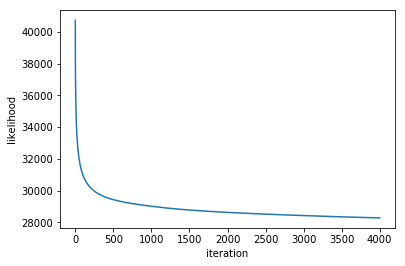

n_iter: 4050 , ||grad|| = 111.398100641


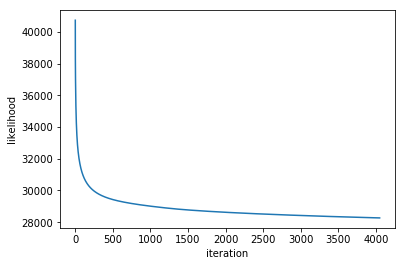

n_iter: 4100 , ||grad|| = 110.57854037


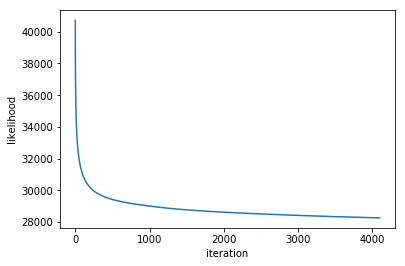

n_iter: 4150 , ||grad|| = 109.76688809


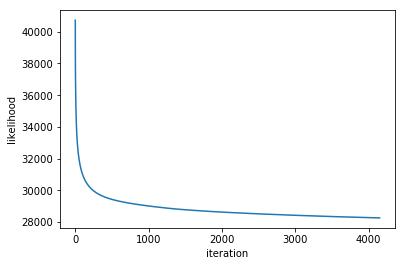

n_iter: 4200 , ||grad|| = 108.963694629


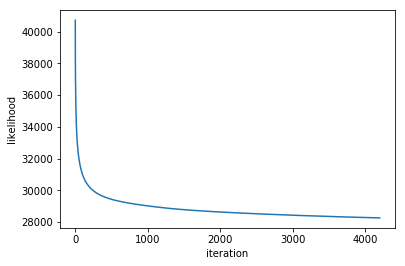

n_iter: 4250 , ||grad|| = 108.169624024


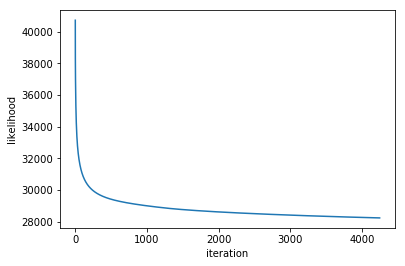

n_iter: 4300 , ||grad|| = 107.385398567


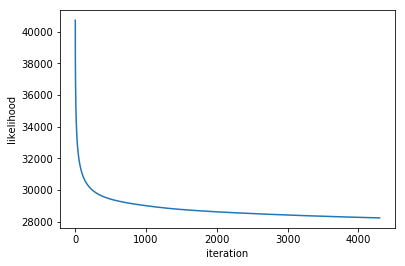

n_iter: 4350 , ||grad|| = 106.6117579


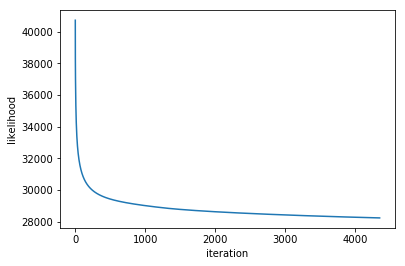

n_iter: 4400 , ||grad|| = 105.849424584


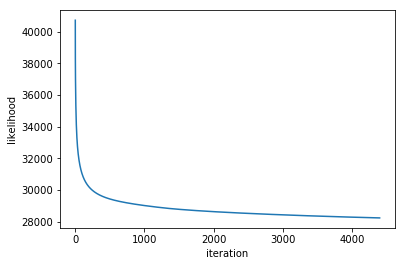

n_iter: 4450 , ||grad|| = 105.099074782


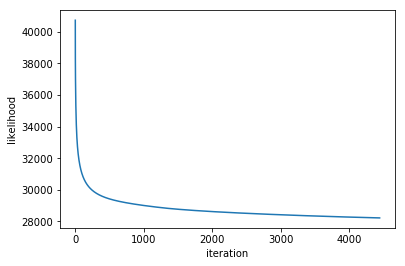

n_iter: 4500 , ||grad|| = 104.361314783


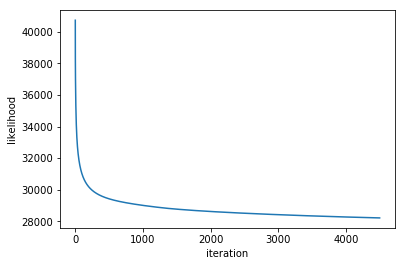

n_iter: 4550 , ||grad|| = 103.63666465


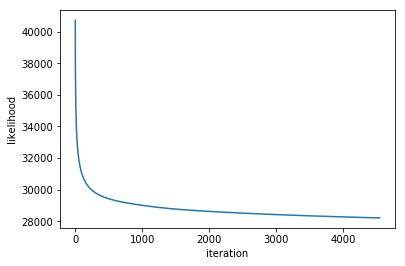

n_iter: 4600 , ||grad|| = 102.925550391


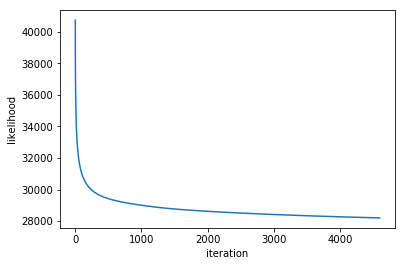

n_iter: 4650 , ||grad|| = 102.228305798


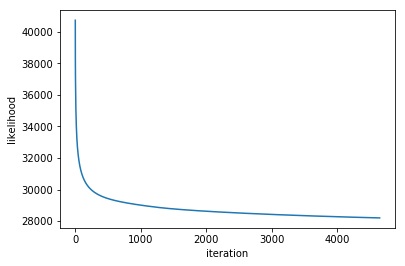

n_iter: 4700 , ||grad|| = 101.54518405


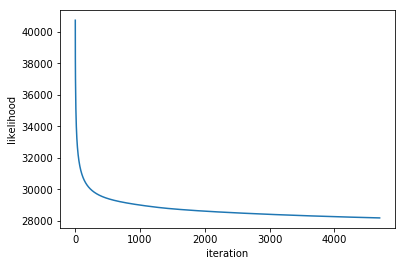

n_iter: 4750 , ||grad|| = 100.876376696


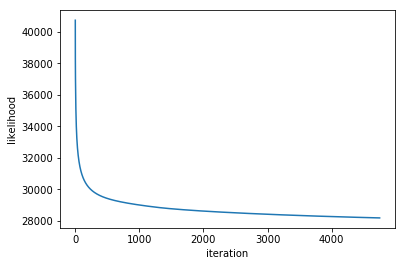

n_iter: 4800 , ||grad|| = 100.222033978


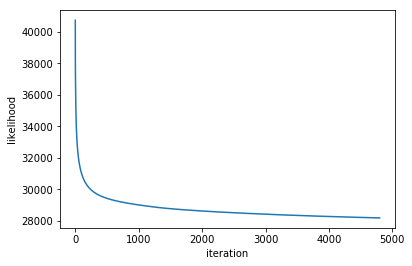

n_iter: 4850 , ||grad|| = 99.5822778084


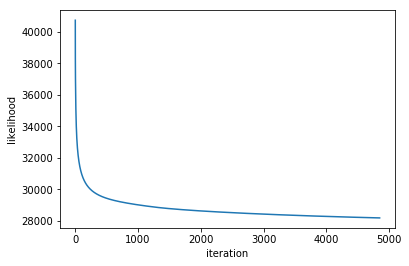

n_iter: 4900 , ||grad|| = 98.9572004003


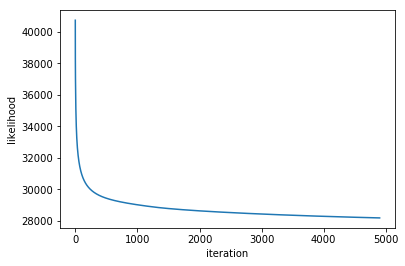

n_iter: 4950 , ||grad|| = 98.3468487146


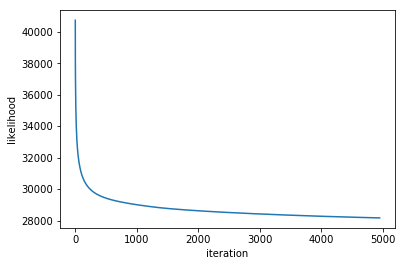

n_iter: 5000 , ||grad|| = 97.7512030055


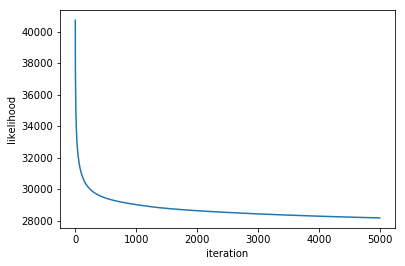

n_iter: 5050 , ||grad|| = 97.1701603153


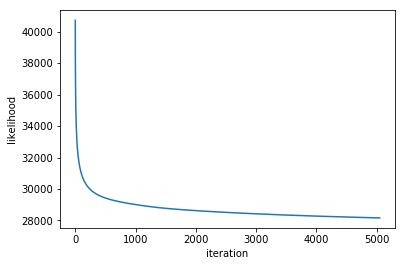

n_iter: 5100 , ||grad|| = 96.6035292458


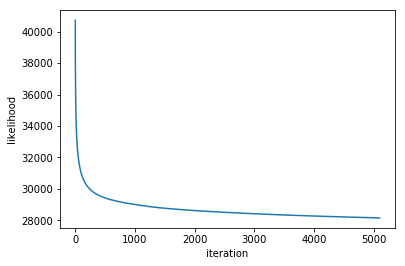

n_iter: 5150 , ||grad|| = 96.0510355939


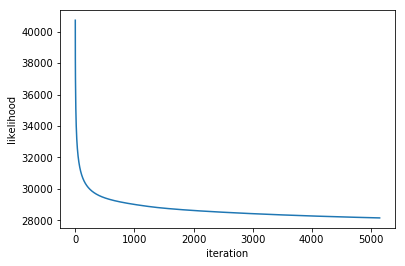

n_iter: 5200 , ||grad|| = 95.5123345963


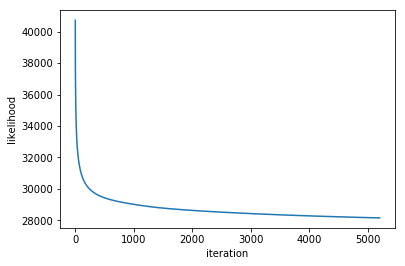

n_iter: 5250 , ||grad|| = 94.9870254491


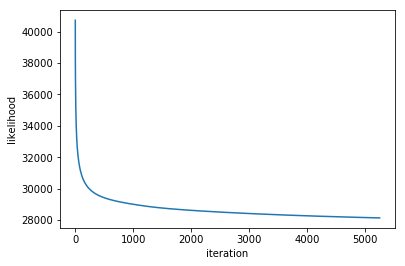

n_iter: 5300 , ||grad|| = 94.4746654492


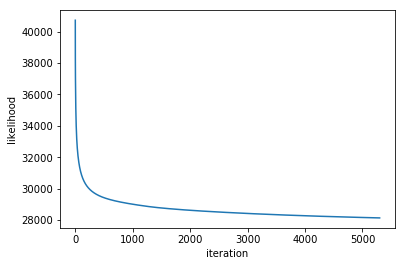

n_iter: 5350 , ||grad|| = 93.9747826892


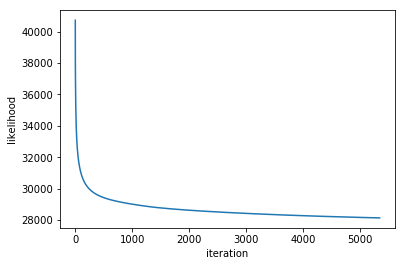

n_iter: 5400 , ||grad|| = 93.4868871181


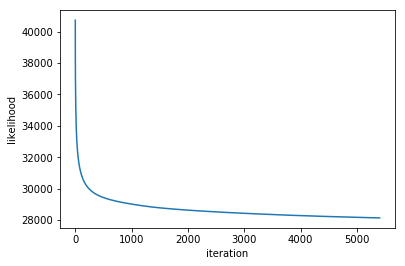

n_iter: 5450 , ||grad|| = 93.0104800761


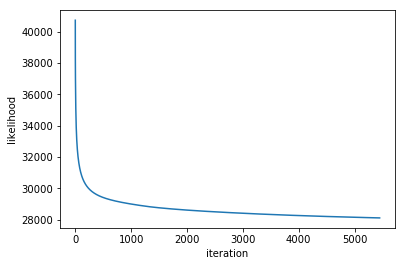

n_iter: 5500 , ||grad|| = 92.5450624238


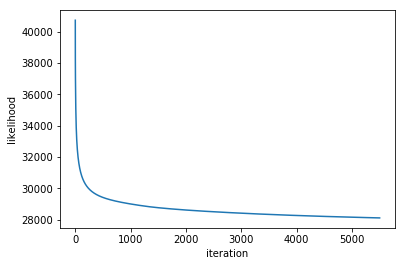

n_iter: 5550 , ||grad|| = 92.0901413224


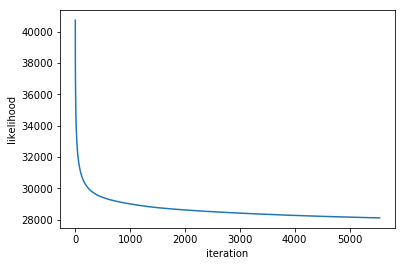

n_iter: 5600 , ||grad|| = 91.6452356681


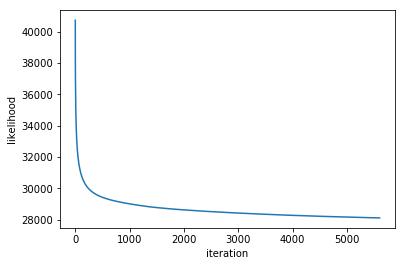

n_iter: 5650 , ||grad|| = 91.2098801763


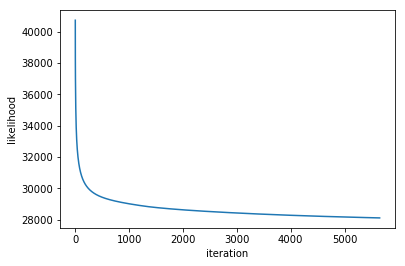

n_iter: 5700 , ||grad|| = 90.7836281384


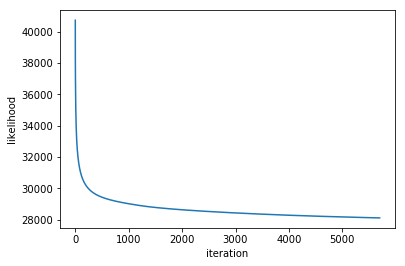

n_iter: 5750 , ||grad|| = 90.3660529241


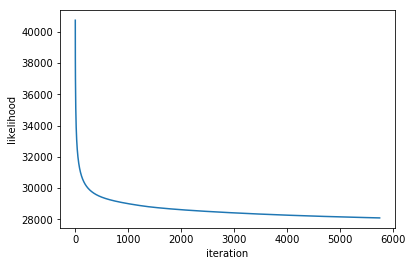

n_iter: 5800 , ||grad|| = 89.9567483545


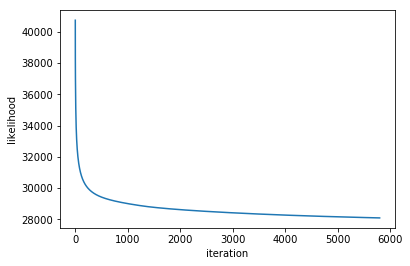

n_iter: 5850 , ||grad|| = 89.5553281185


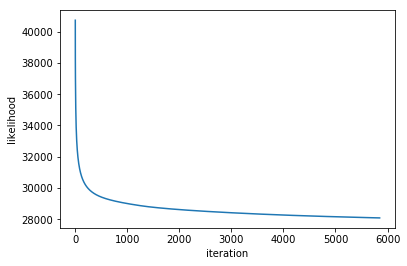

n_iter: 5900 , ||grad|| = 89.1614244426


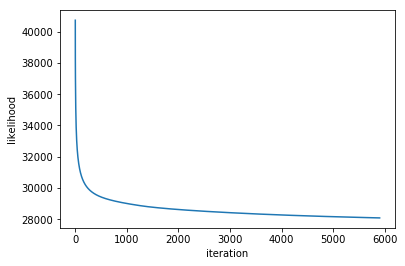

n_iter: 5950 , ||grad|| = 88.7746862393


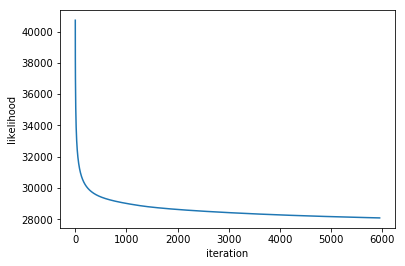

n_iter: 6000 , ||grad|| = 88.3947769678


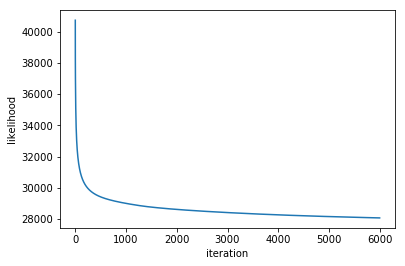

n_iter: 6050 , ||grad|| = 88.0213724301


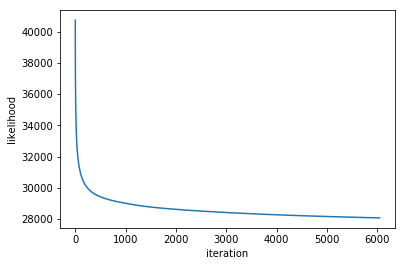

n_iter: 6100 , ||grad|| = 87.6541587041


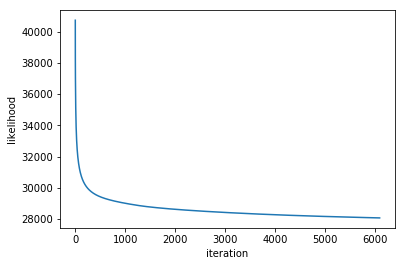

n_iter: 6150 , ||grad|| = 87.2928303907


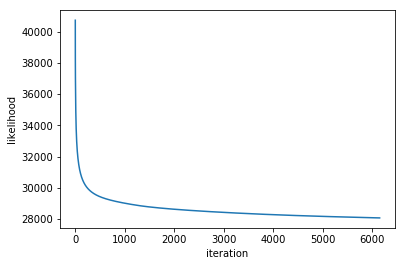

n_iter: 6200 , ||grad|| = 86.9370893077


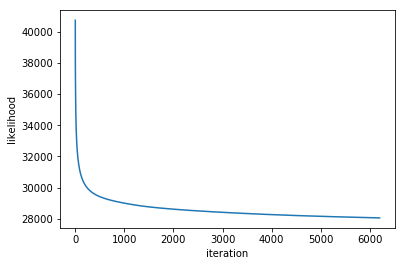

n_iter: 6250 , ||grad|| = 86.5866437275


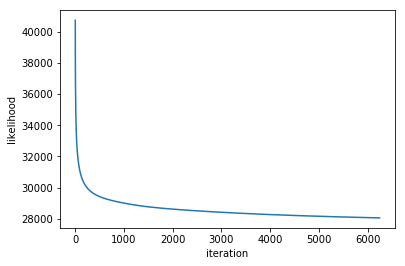

n_iter: 6300 , ||grad|| = 86.2412082058


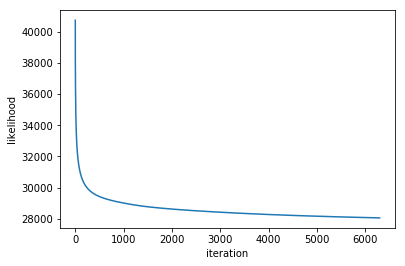

n_iter: 6350 , ||grad|| = 85.9005040035


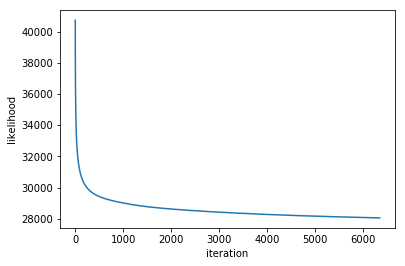

n_iter: 6400 , ||grad|| = 85.5642600606


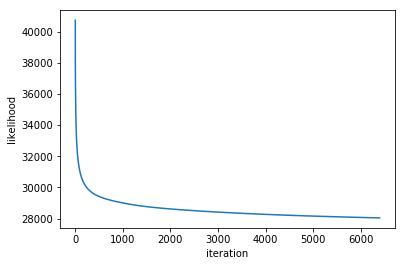

n_iter: 6450 , ||grad|| = 85.2322144426


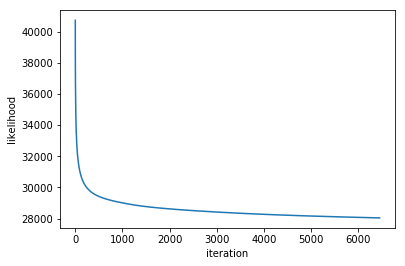

n_iter: 6500 , ||grad|| = 84.9041161509


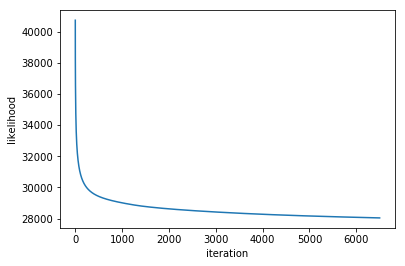

n_iter: 6550 , ||grad|| = 84.5797271652


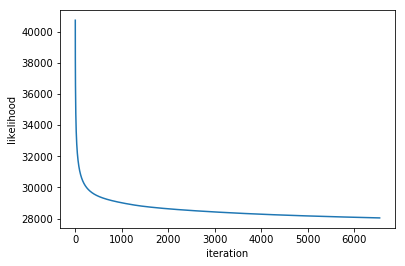

n_iter: 6600 , ||grad|| = 84.2588245827


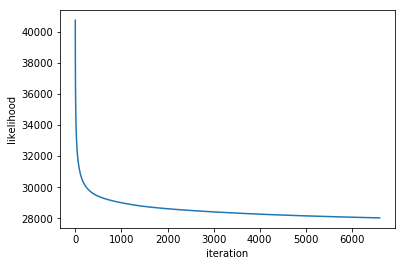

n_iter: 6650 , ||grad|| = 83.941202713


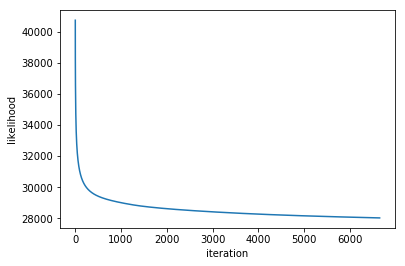

n_iter: 6700 , ||grad|| = 83.6266750028


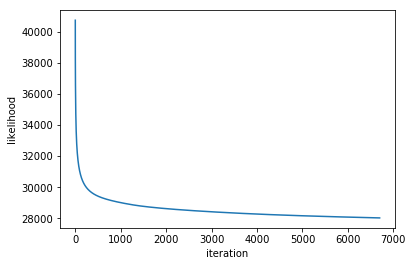

n_iter: 6750 , ||grad|| = 83.3150756782


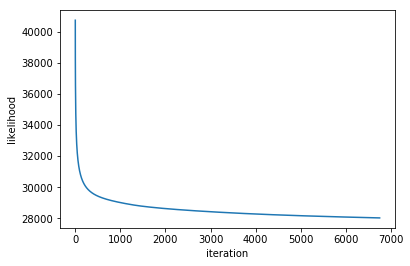

n_iter: 6800 , ||grad|| = 83.006261017


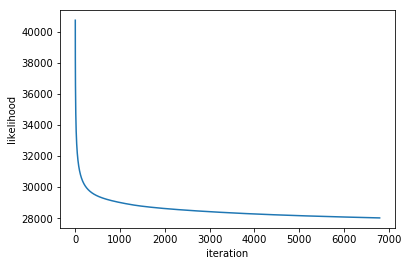

n_iter: 6850 , ||grad|| = 82.7001101852


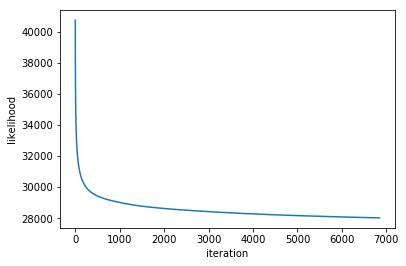

n_iter: 6900 , ||grad|| = 82.3965256


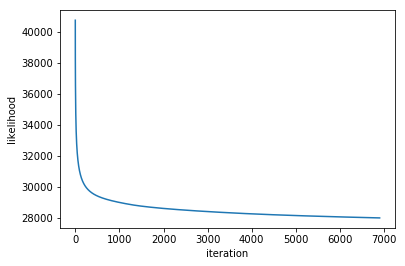

n_iter: 6950 , ||grad|| = 82.0954328033


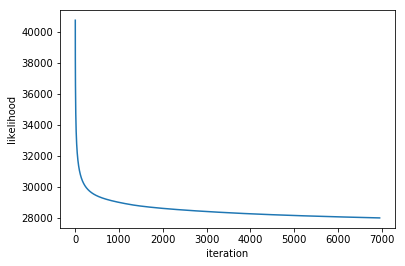

n_iter: 7000 , ||grad|| = 81.7967798564


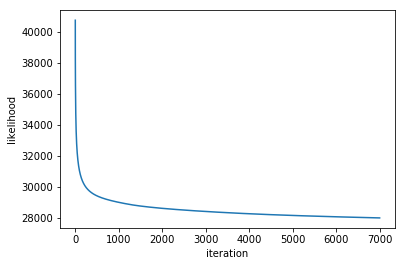

n_iter: 7050 , ||grad|| = 81.5005362819


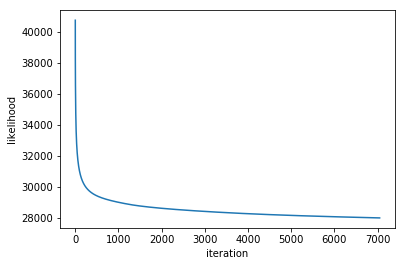

n_iter: 7100 , ||grad|| = 81.2066916011


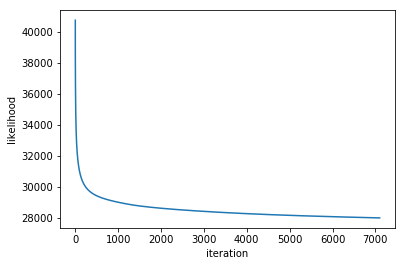

n_iter: 7150 , ||grad|| = 80.9152535233


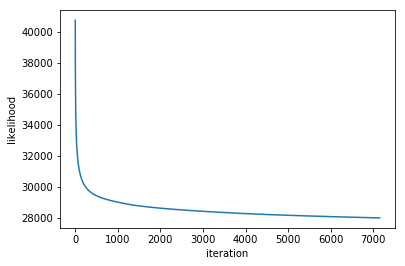

n_iter: 7200 , ||grad|| = 80.6262458571


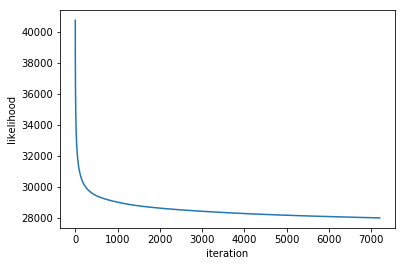

n_iter: 7250 , ||grad|| = 80.3397062179


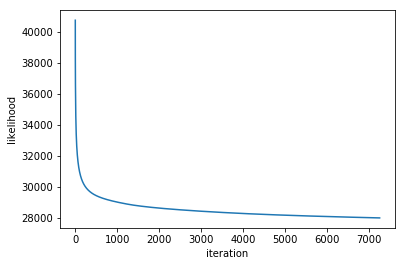

n_iter: 7300 , ||grad|| = 80.0556836069


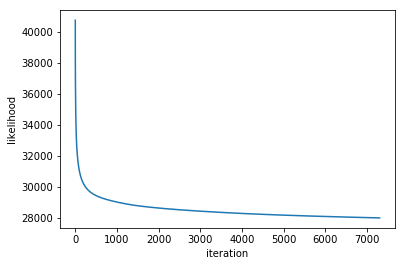

n_iter: 7350 , ||grad|| = 79.7742359369


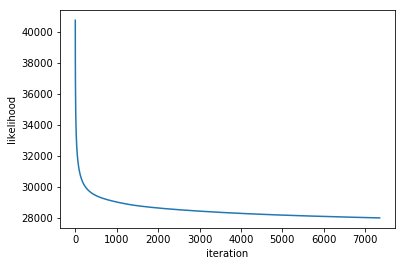

n_iter: 7400 , ||grad|| = 79.4954275752


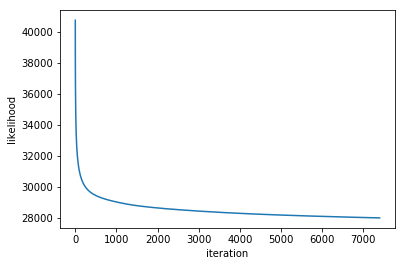

n_iter: 7450 , ||grad|| = 79.2193269655


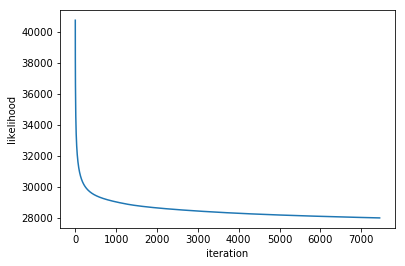

n_iter: 7500 , ||grad|| = 78.9460043825


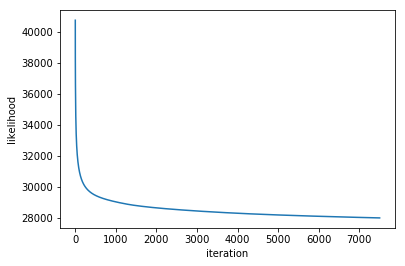

n_iter: 7550 , ||grad|| = 78.6755298626


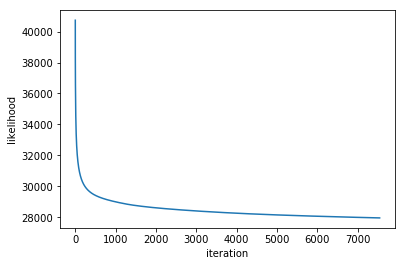

n_iter: 7600 , ||grad|| = 78.4079713431


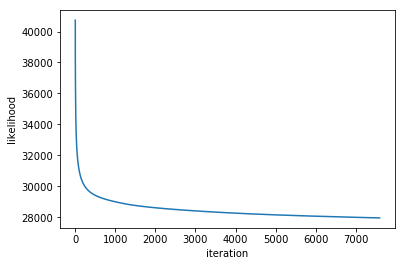

n_iter: 7650 , ||grad|| = 78.1433930305


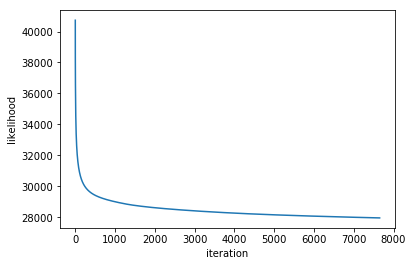

n_iter: 7700 , ||grad|| = 77.8818540109


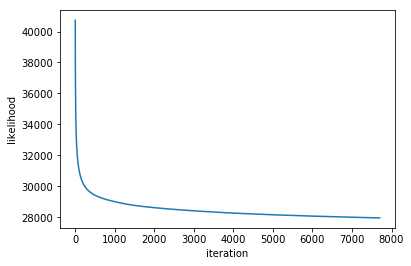

n_iter: 7750 , ||grad|| = 77.6234071026


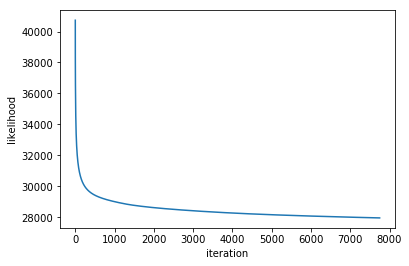

n_iter: 7800 , ||grad|| = 77.3680979484


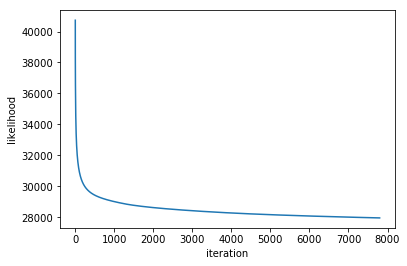

n_iter: 7850 , ||grad|| = 77.1159643336


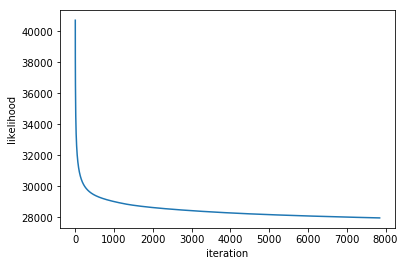

n_iter: 7900 , ||grad|| = 76.8670357151


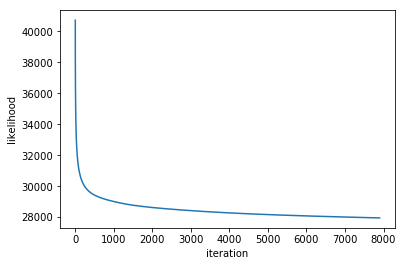

n_iter: 7950 , ||grad|| = 76.6213329409


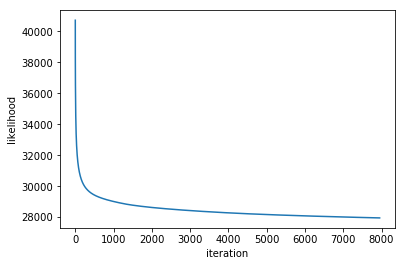

n_iter: 8000 , ||grad|| = 76.3788681406


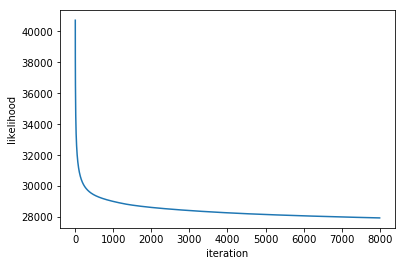

n_iter: 8050 , ||grad|| = 76.1396447614


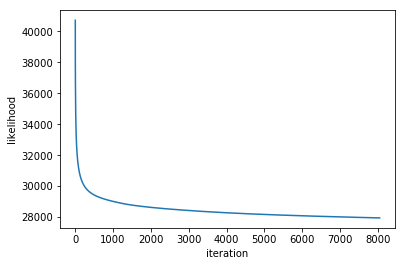

n_iter: 8100 , ||grad|| = 75.9036577307


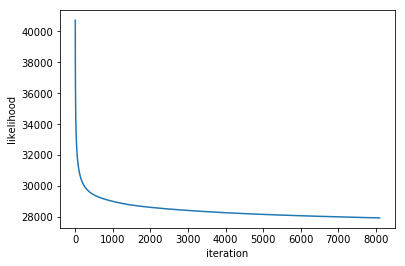

n_iter: 8150 , ||grad|| = 75.6708937212


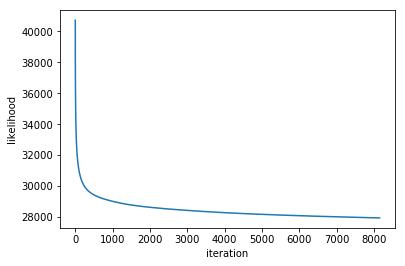

n_iter: 8200 , ||grad|| = 75.4413315003


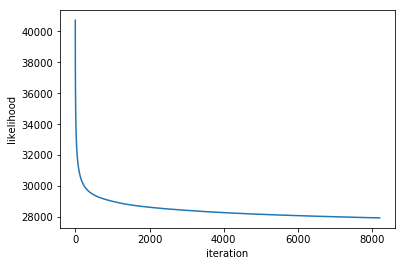

n_iter: 8250 , ||grad|| = 75.2149423438


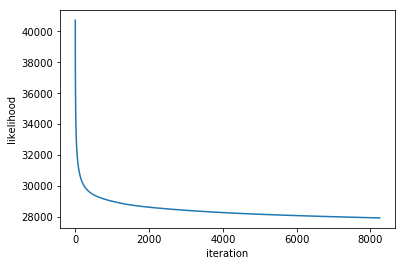

n_iter: 8300 , ||grad|| = 74.9916904989


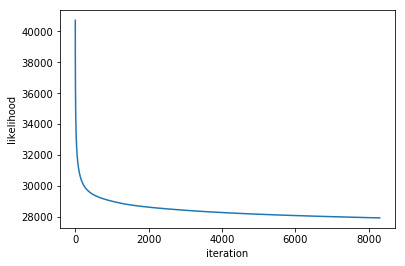

n_iter: 8350 , ||grad|| = 74.7715336803


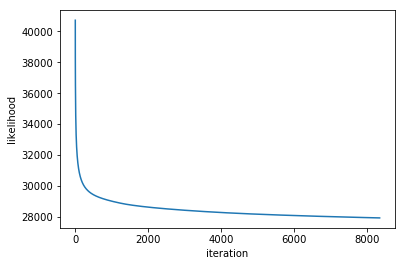

n_iter: 8400 , ||grad|| = 74.5544235889


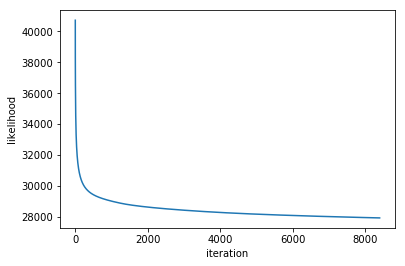

n_iter: 8450 , ||grad|| = 74.3403064411


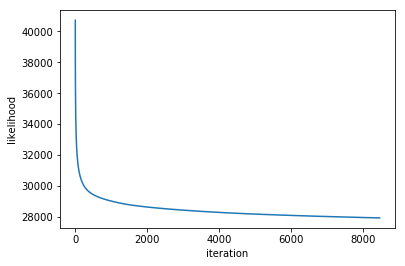

n_iter: 8500 , ||grad|| = 74.1291235003


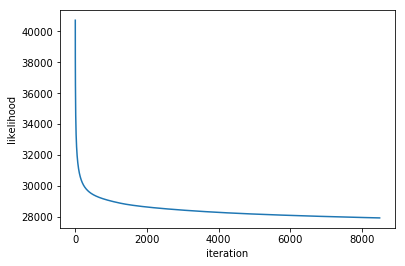

n_iter: 8550 , ||grad|| = 73.9208116048


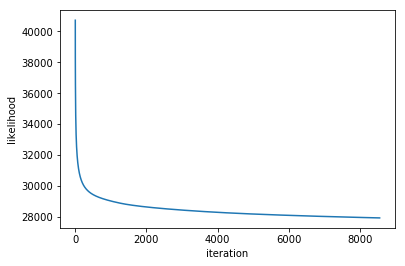

n_iter: 8600 , ||grad|| = 73.7153036852


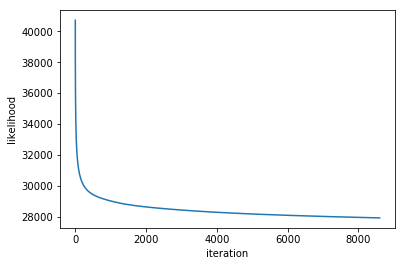

n_iter: 8650 , ||grad|| = 73.5125292691


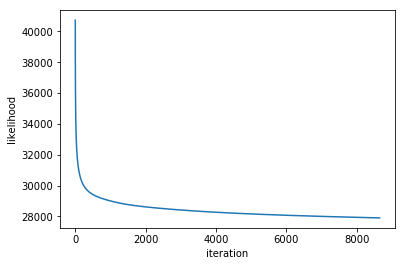

n_iter: 8700 , ||grad|| = 73.312414968


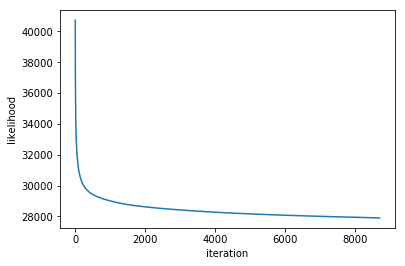

n_iter: 8750 , ||grad|| = 73.1148849479


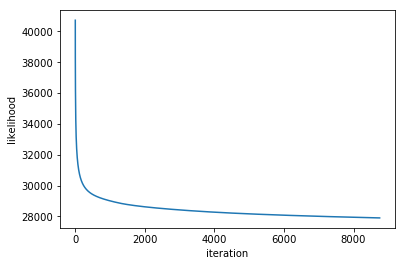

n_iter: 8800 , ||grad|| = 72.9198613788


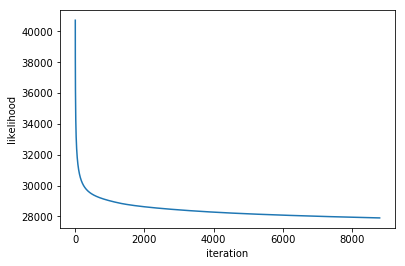

n_iter: 8850 , ||grad|| = 72.7272648674


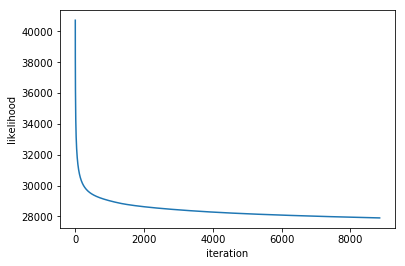

n_iter: 8900 , ||grad|| = 72.5370148688


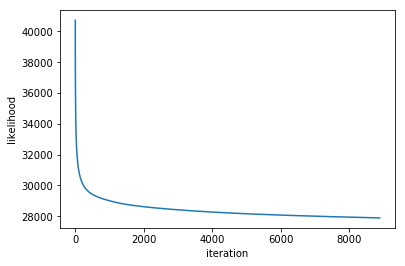

n_iter: 8950 , ||grad|| = 72.3490300818


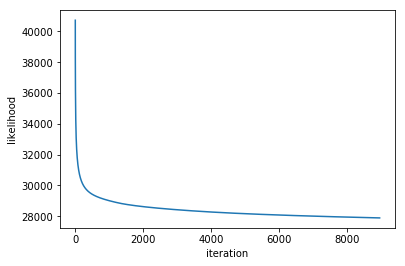

n_iter: 9000 , ||grad|| = 72.1632288271


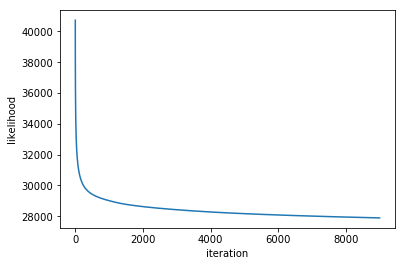

n_iter: 9050 , ||grad|| = 71.9795294089


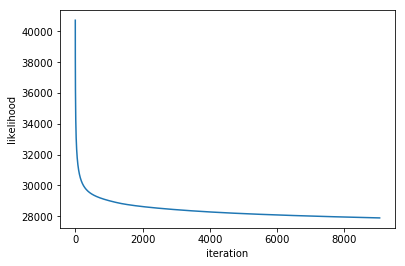

n_iter: 9100 , ||grad|| = 71.7978504637


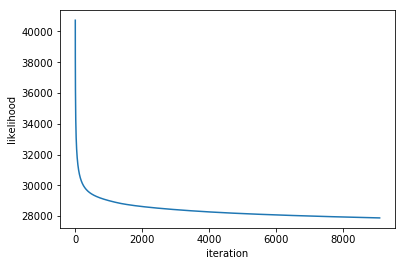

n_iter: 9150 , ||grad|| = 71.618111295


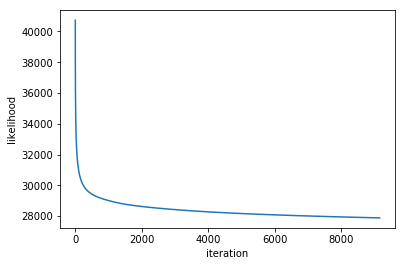

n_iter: 9200 , ||grad|| = 71.4402321968


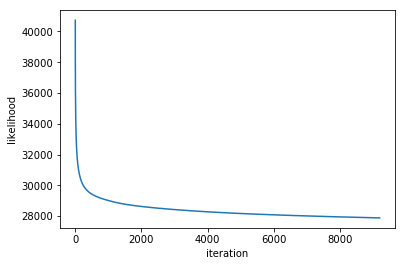

n_iter: 9250 , ||grad|| = 71.2641347654


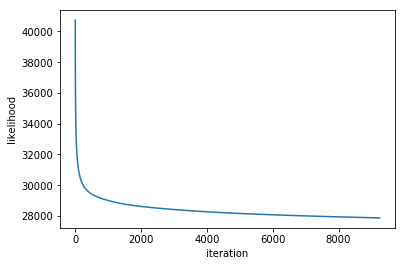

n_iter: 9300 , ||grad|| = 71.0897422018


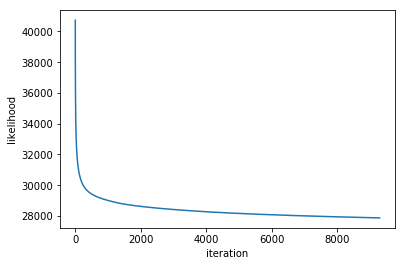

n_iter: 9350 , ||grad|| = 70.9169796028


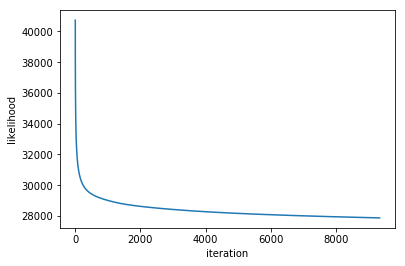

n_iter: 9400 , ||grad|| = 70.7457742432


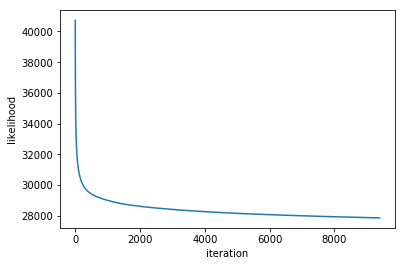

n_iter: 9450 , ||grad|| = 70.5760558454


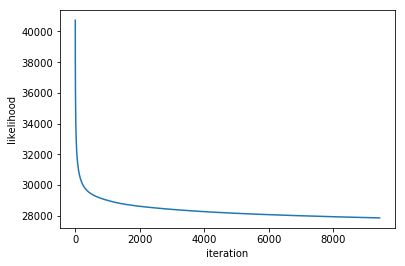

n_iter: 9500 , ||grad|| = 70.4077568378


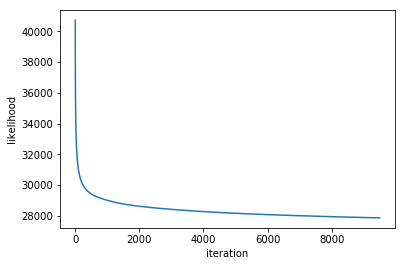

n_iter: 9550 , ||grad|| = 70.240812599


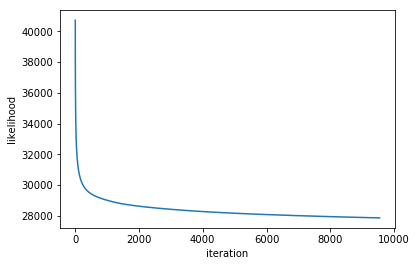

n_iter: 9600 , ||grad|| = 70.0751616854


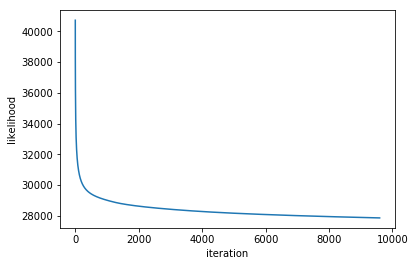

n_iter: 9650 , ||grad|| = 69.9107460398


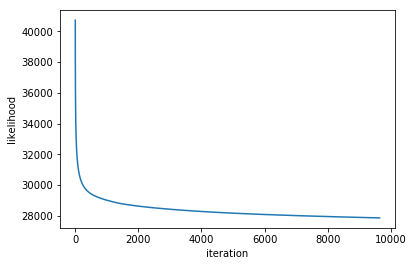

n_iter: 9700 , ||grad|| = 69.7475111773


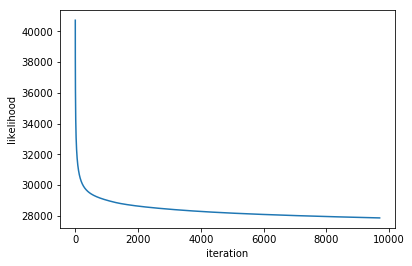

n_iter: 9750 , ||grad|| = 69.5854063457


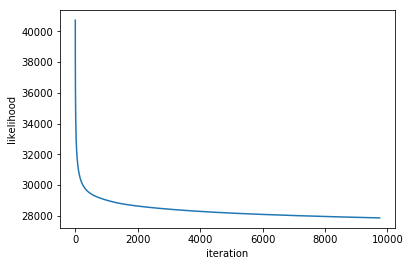

n_iter: 9800 , ||grad|| = 69.4243846552


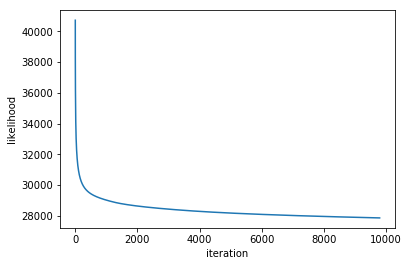

n_iter: 9850 , ||grad|| = 69.264403174


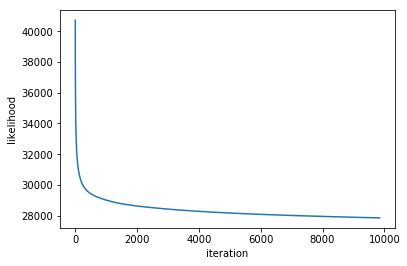

n_iter: 9900 , ||grad|| = 69.105422986


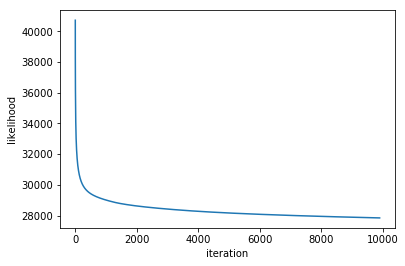

n_iter: 9950 , ||grad|| = 68.9474092065


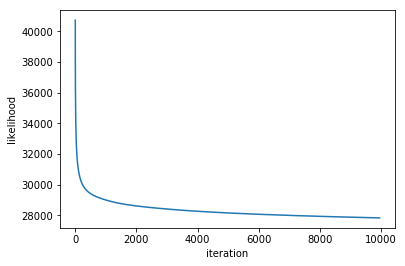

n_iter: 10000 , ||grad|| = 68.7903309532


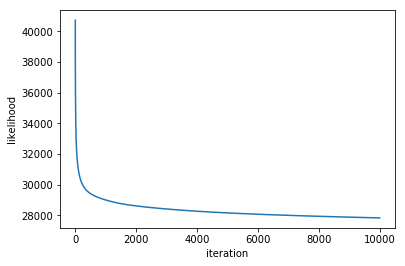

n_iter: 10050 , ||grad|| = 68.6341612696


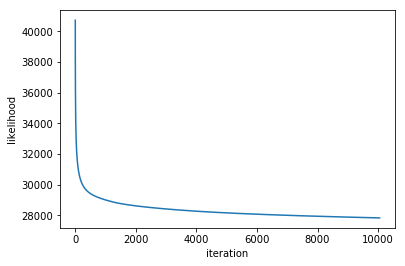

n_iter: 10100 , ||grad|| = 68.4788769998


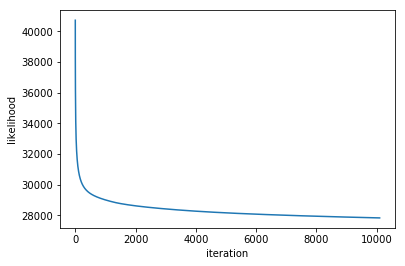

n_iter: 10150 , ||grad|| = 68.3244586147


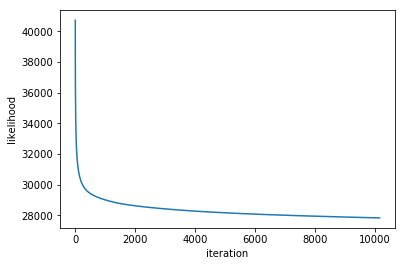

n_iter: 10200 , ||grad|| = 68.1708899913


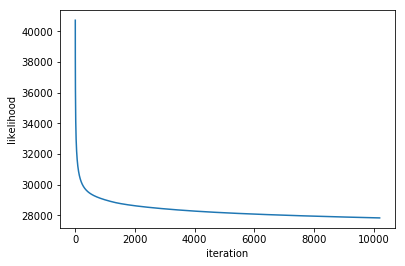

n_iter: 10250 , ||grad|| = 68.0181581476


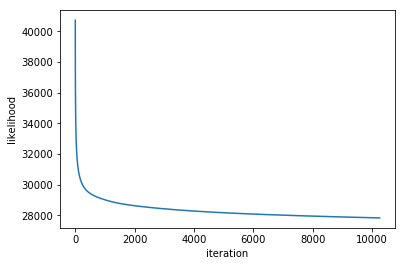

n_iter: 10300 , ||grad|| = 67.8662529379


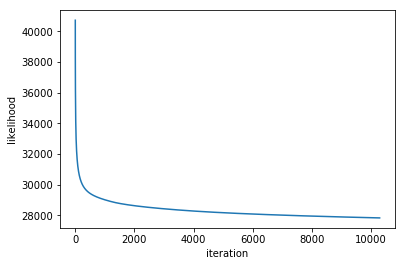

n_iter: 10350 , ||grad|| = 67.7151667159


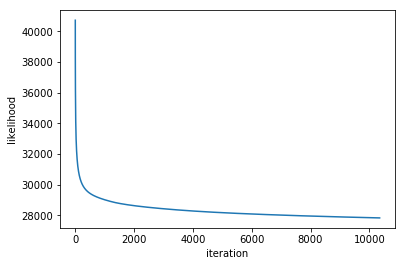

n_iter: 10400 , ||grad|| = 67.5648939716


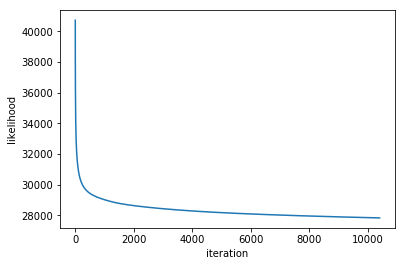

n_iter: 10450 , ||grad|| = 67.4154309524


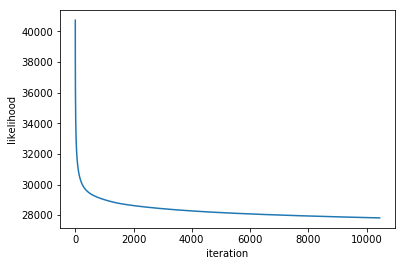

n_iter: 10500 , ||grad|| = 67.2667752776


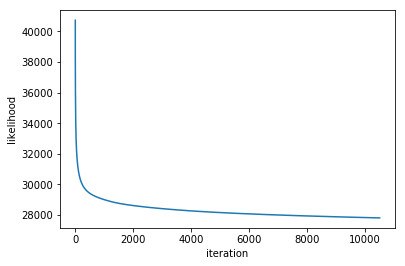

n_iter: 10550 , ||grad|| = 67.1189255563


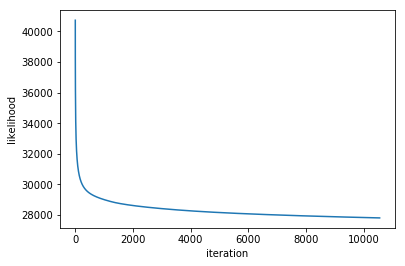

n_iter: 10600 , ||grad|| = 66.9718810198


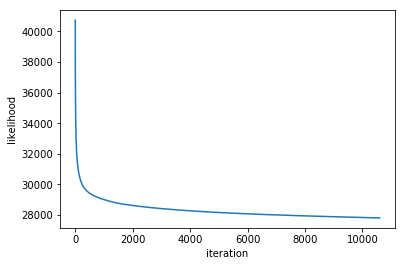

n_iter: 10650 , ||grad|| = 66.8256411761


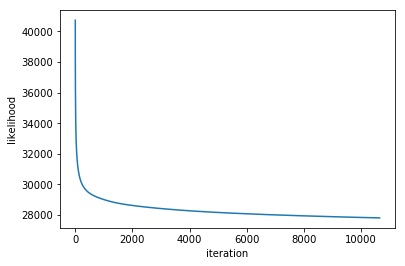

n_iter: 10700 , ||grad|| = 66.6802054961


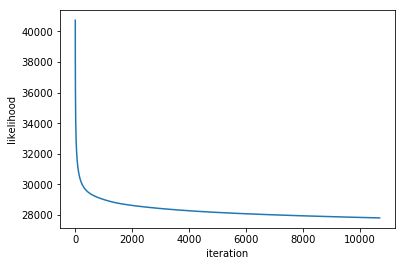

n_iter: 10750 , ||grad|| = 66.5355731388


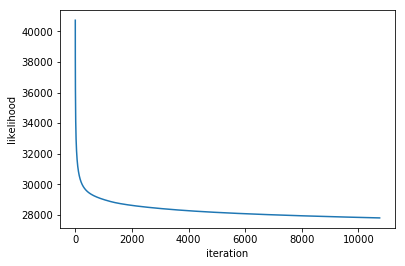

n_iter: 10800 , ||grad|| = 66.3917427185


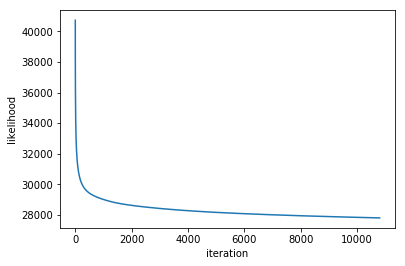

n_iter: 10850 , ||grad|| = 66.2487121191


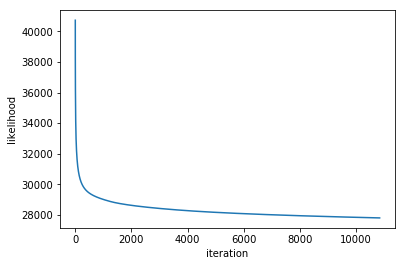

n_iter: 10900 , ||grad|| = 66.1064783545


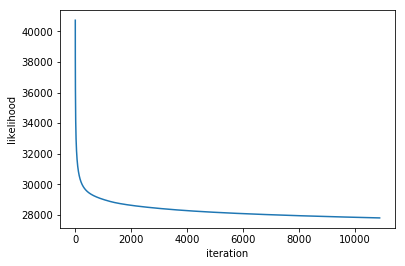

n_iter: 10950 , ||grad|| = 65.9650374761


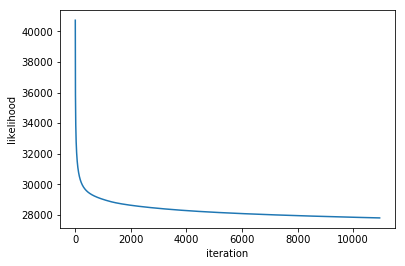

n_iter: 11000 , ||grad|| = 65.824384523


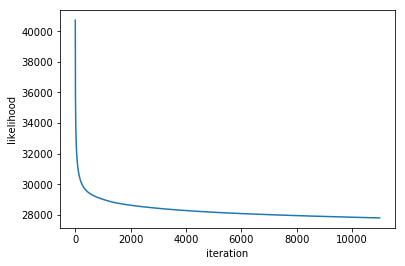

n_iter: 11050 , ||grad|| = 65.6845135109


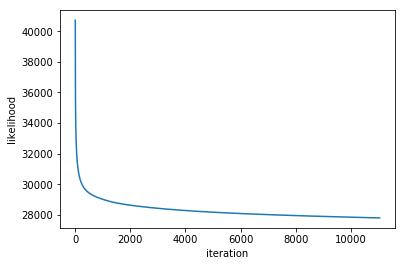

n_iter: 11100 , ||grad|| = 65.5454174558


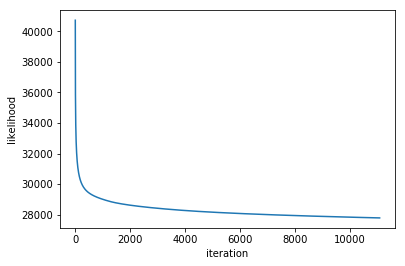

n_iter: 11150 , ||grad|| = 65.4070884251


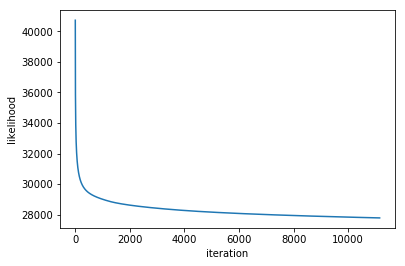

n_iter: 11200 , ||grad|| = 65.2695176113


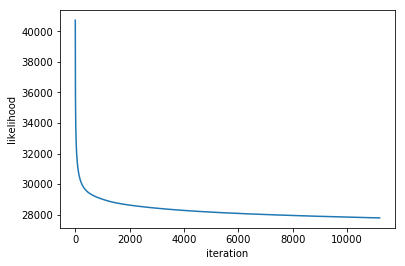

n_iter: 11250 , ||grad|| = 65.1326954208


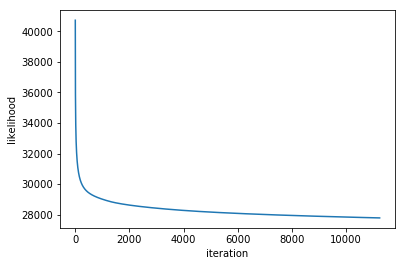

n_iter: 11300 , ||grad|| = 64.9966115742


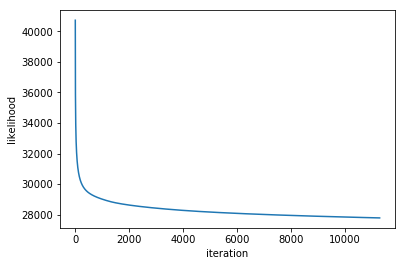

n_iter: 11350 , ||grad|| = 64.8612552109


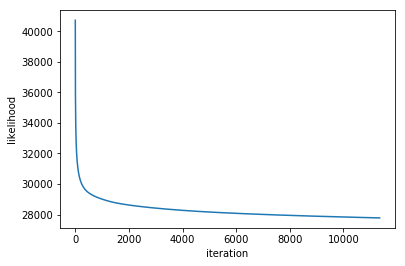

n_iter: 11400 , ||grad|| = 64.7266149963


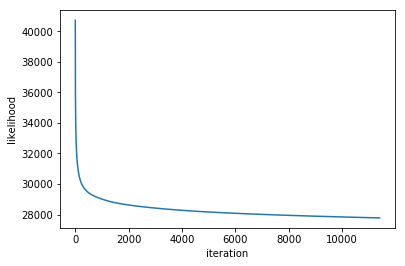

n_iter: 11450 , ||grad|| = 64.5926792251


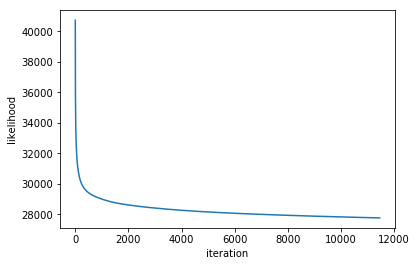

n_iter: 11500 , ||grad|| = 64.4594359212


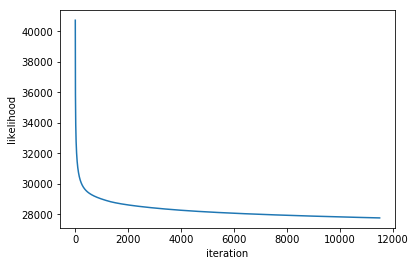

n_iter: 11550 , ||grad|| = 64.32687293


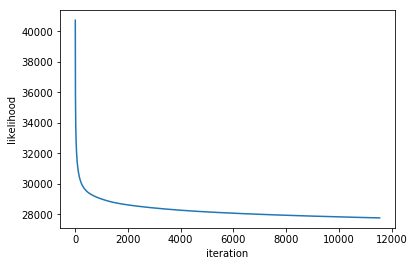

n_iter: 11600 , ||grad|| = 64.1949780037


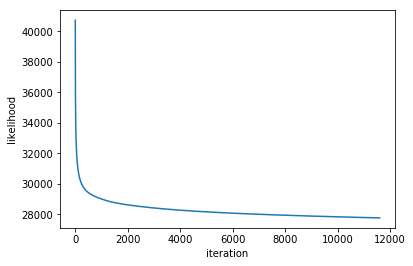

n_iter: 11650 , ||grad|| = 64.0637388776


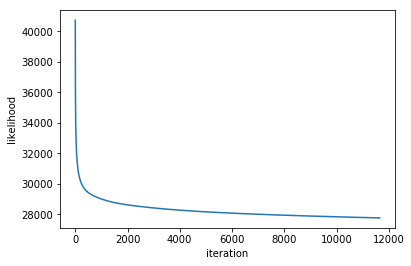

n_iter: 11700 , ||grad|| = 63.9331433383


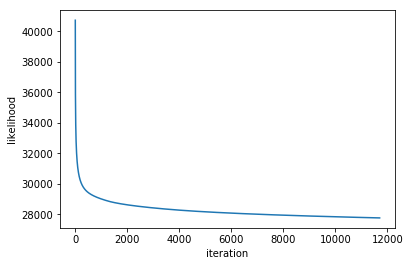

n_iter: 11750 , ||grad|| = 63.8031792839


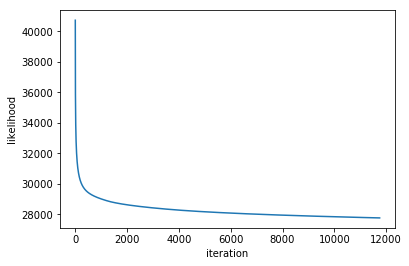

n_iter: 11800 , ||grad|| = 63.6738347762


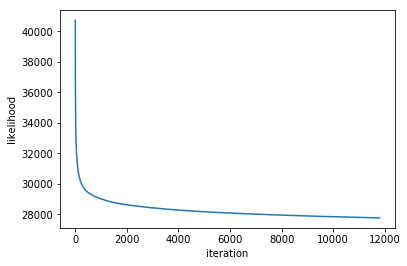

n_iter: 11850 , ||grad|| = 63.5450980867


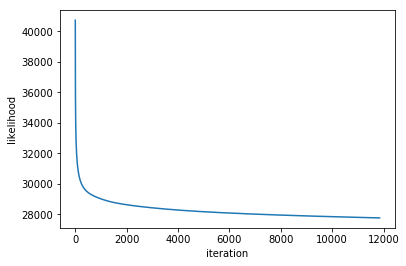

n_iter: 11900 , ||grad|| = 63.4169577357


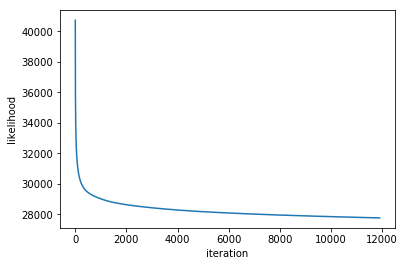

n_iter: 11950 , ||grad|| = 63.2894025264


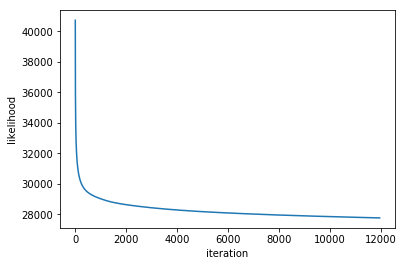

n_iter: 12000 , ||grad|| = 63.1624215743


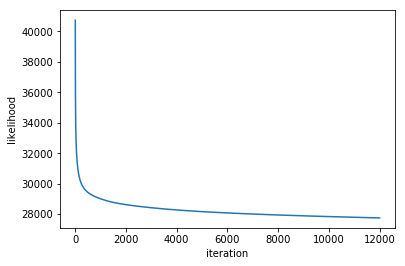

n_iter: 12050 , ||grad|| = 63.0360043324


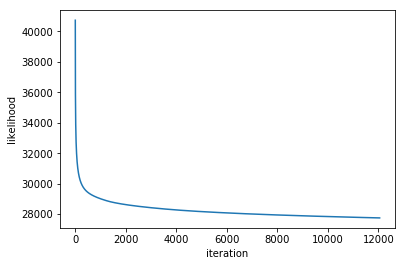

n_iter: 12100 , ||grad|| = 62.9101406129


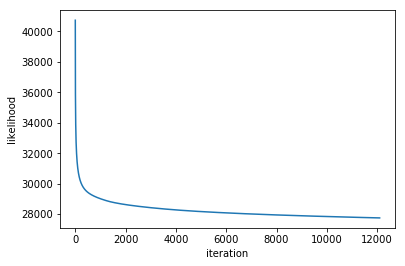

n_iter: 12150 , ||grad|| = 62.7848206062


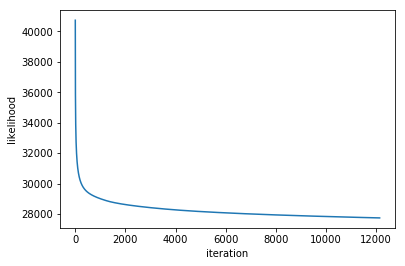

n_iter: 12200 , ||grad|| = 62.6600348966


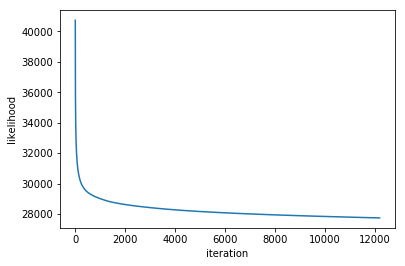

n_iter: 12250 , ||grad|| = 62.5357744762


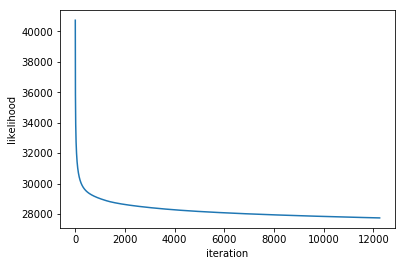

n_iter: 12300 , ||grad|| = 62.4120307558


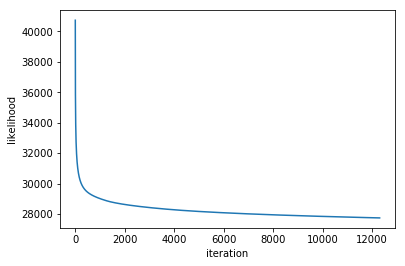

n_iter: 12350 , ||grad|| = 62.2887955748


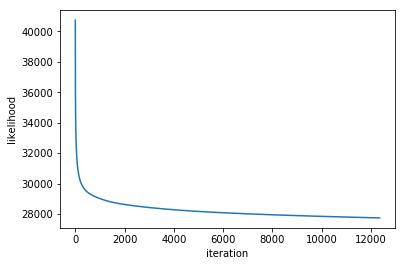

n_iter: 12400 , ||grad|| = 62.1660612077


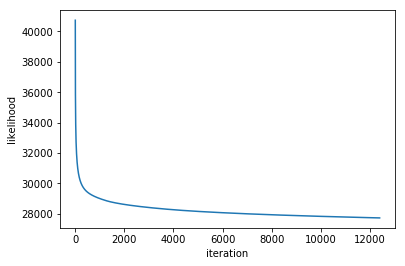

n_iter: 12450 , ||grad|| = 62.0438203695


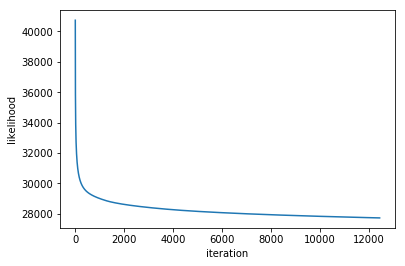

n_iter: 12500 , ||grad|| = 61.9220662187


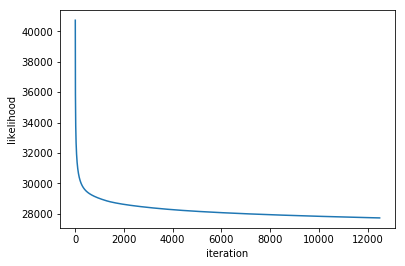

n_iter: 12550 , ||grad|| = 61.8007923583


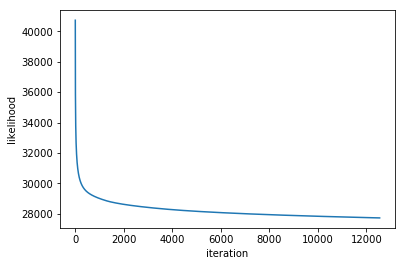

n_iter: 12600 , ||grad|| = 61.6799928349


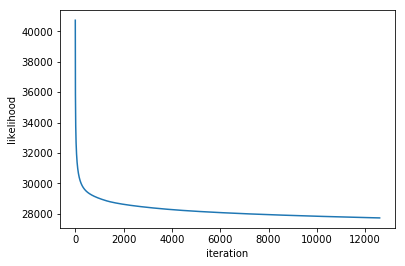

n_iter: 12650 , ||grad|| = 61.5596621354


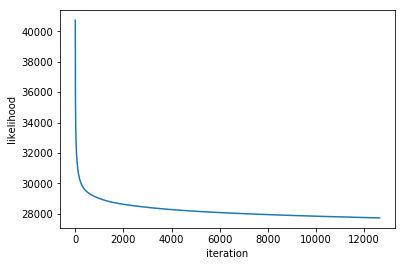

n_iter: 12700 , ||grad|| = 61.4397951821


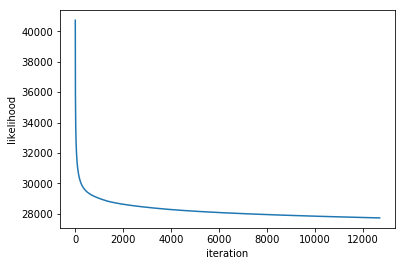

n_iter: 12750 , ||grad|| = 61.3203873254


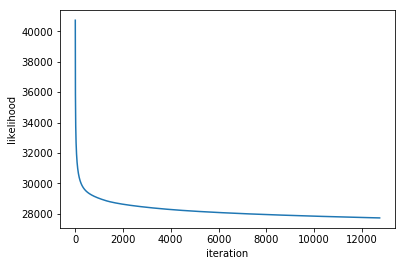

n_iter: 12800 , ||grad|| = 61.201434335


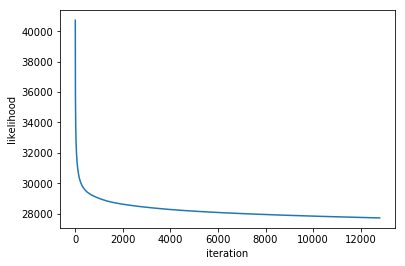

n_iter: 12850 , ||grad|| = 61.0829323892


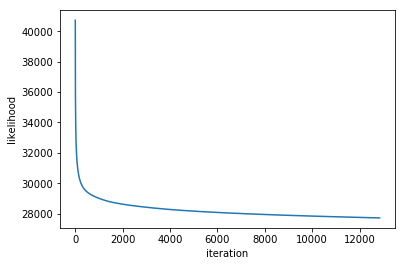

n_iter: 12900 , ||grad|| = 60.9648780617


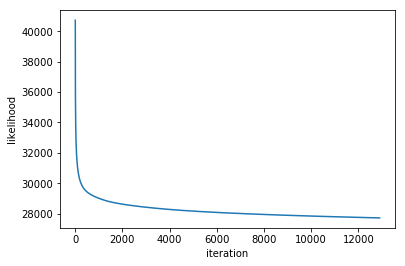

n_iter: 12950 , ||grad|| = 60.8472683082


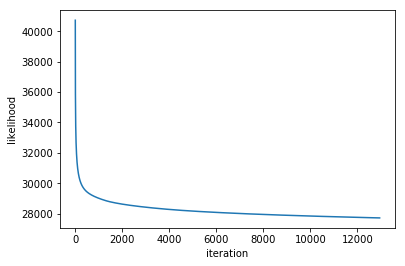

n_iter: 13000 , ||grad|| = 60.7301004503


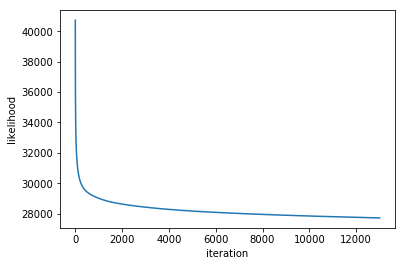

n_iter: 13050 , ||grad|| = 60.6133721592


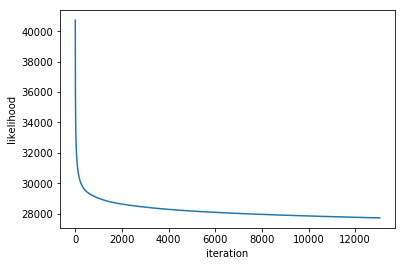

n_iter: 13100 , ||grad|| = 60.497081437


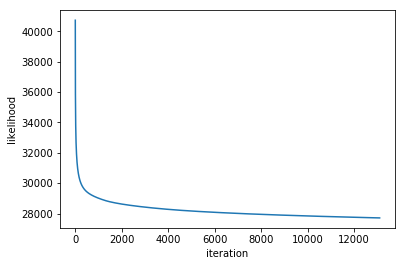

n_iter: 13150 , ||grad|| = 60.3812265986


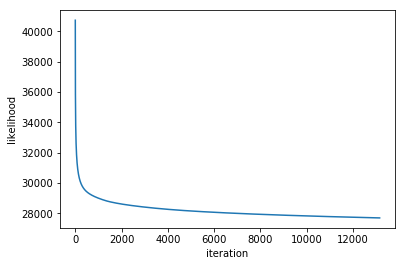

n_iter: 13200 , ||grad|| = 60.2658062519


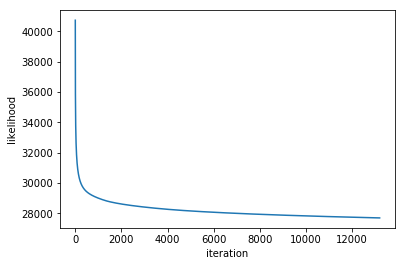

n_iter: 13250 , ||grad|| = 60.1508192776


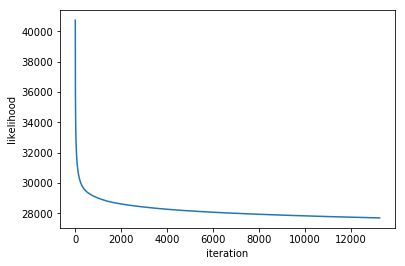

n_iter: 13300 , ||grad|| = 60.0362648091


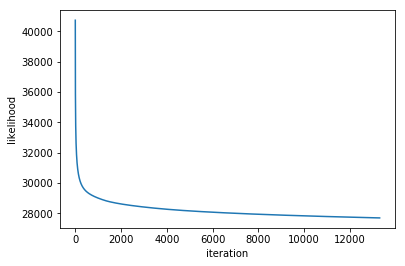

n_iter: 13350 , ||grad|| = 59.9221422123


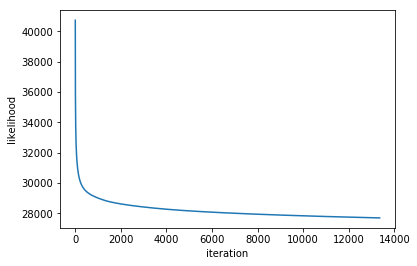

n_iter: 13400 , ||grad|| = 59.8084510641


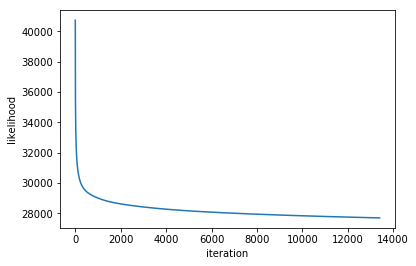

n_iter: 13450 , ||grad|| = 59.6951911331


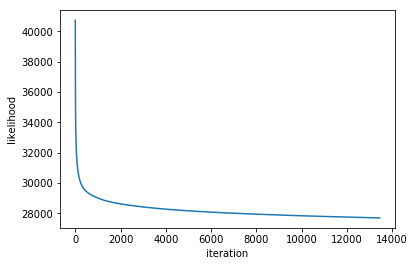

n_iter: 13500 , ||grad|| = 59.5823623588


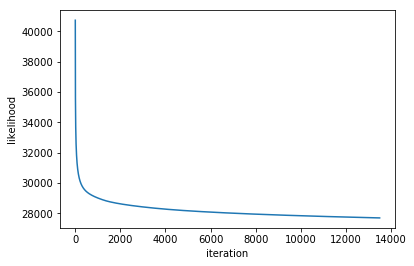

n_iter: 13550 , ||grad|| = 59.4699648316


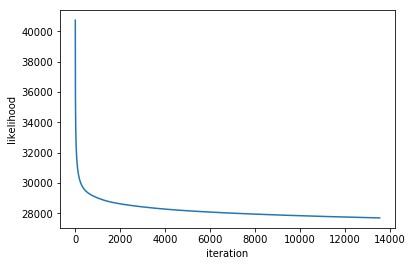

n_iter: 13600 , ||grad|| = 59.3579987732


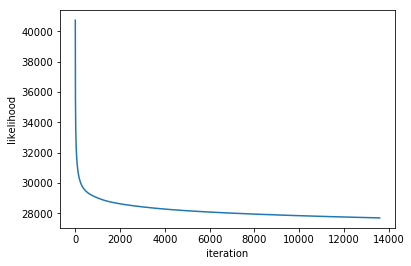

n_iter: 13650 , ||grad|| = 59.2464645167


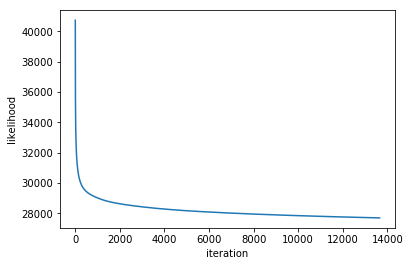

n_iter: 13700 , ||grad|| = 59.1353624874


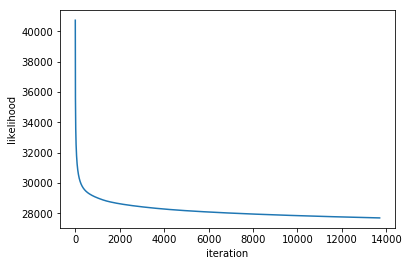

n_iter: 13750 , ||grad|| = 59.0246931818


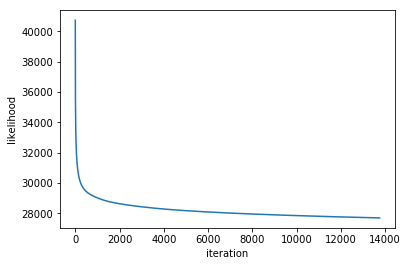

n_iter: 13800 , ||grad|| = 58.9144571474


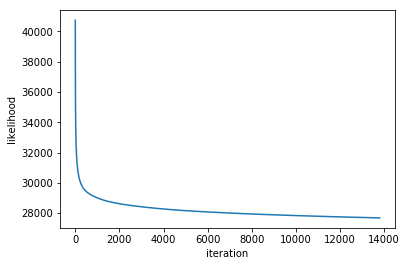

n_iter: 13850 , ||grad|| = 58.8046549599


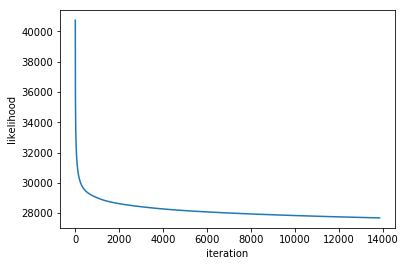

n_iter: 13900 , ||grad|| = 58.6952871984


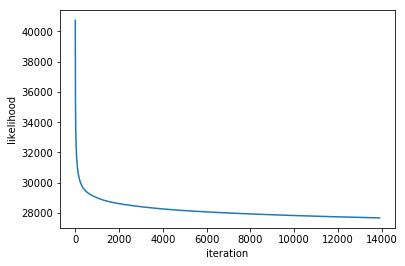

n_iter: 13950 , ||grad|| = 58.5863544172


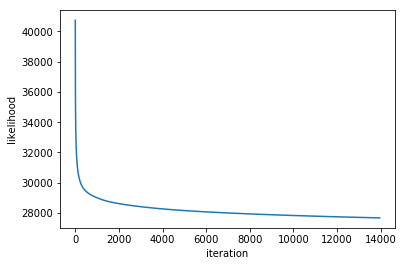

n_iter: 14000 , ||grad|| = 58.4778571126


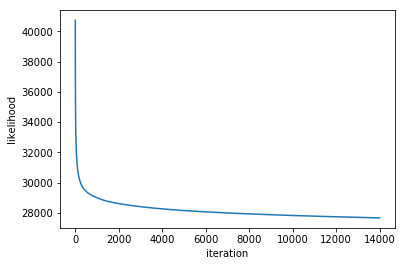

n_iter: 14050 , ||grad|| = 58.369795682


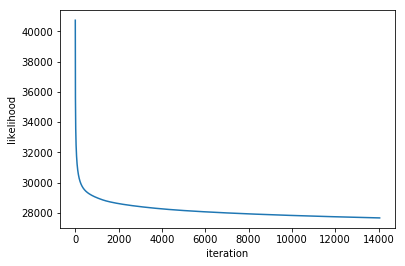

n_iter: 14100 , ||grad|| = 58.2621703746


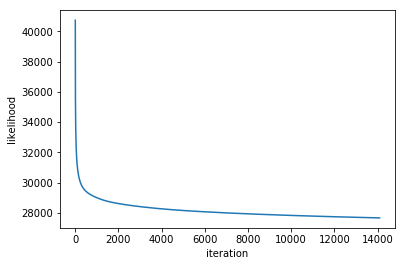

n_iter: 14150 , ||grad|| = 58.1549812292


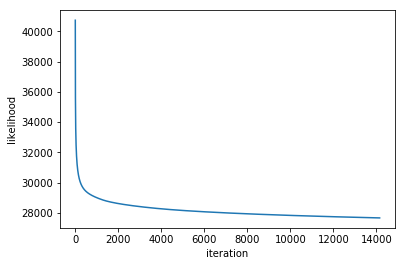

n_iter: 14200 , ||grad|| = 58.0482279972


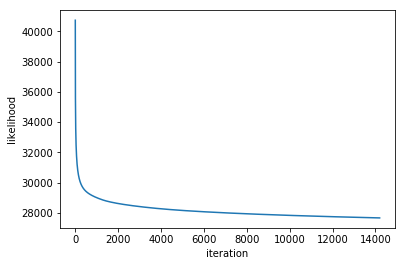

n_iter: 14250 , ||grad|| = 57.9419100468


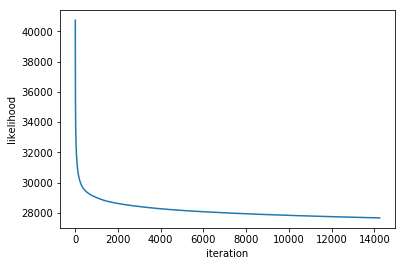

n_iter: 14300 , ||grad|| = 57.8360262483


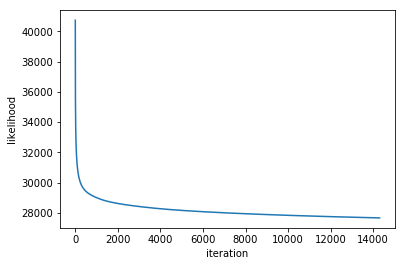

n_iter: 14350 , ||grad|| = 57.7305748416


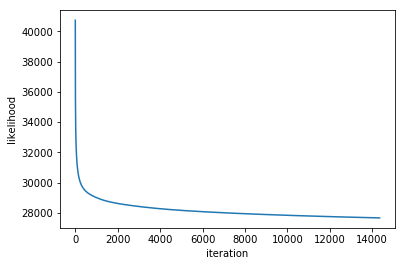

n_iter: 14400 , ||grad|| = 57.6255532935


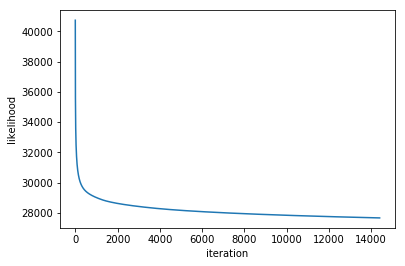

n_iter: 14450 , ||grad|| = 57.5209581659


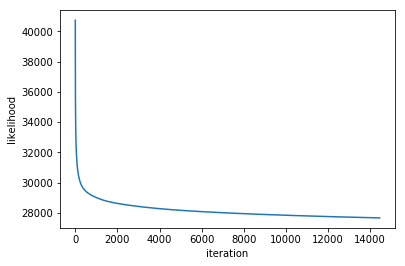

n_iter: 14500 , ||grad|| = 57.4167850338


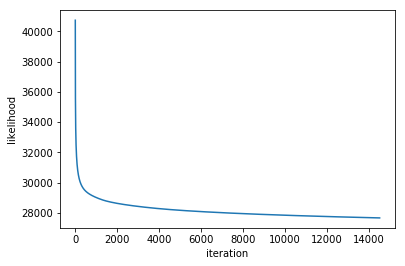

n_iter: 14550 , ||grad|| = 57.3130285201


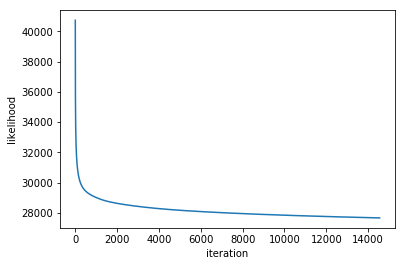

n_iter: 14600 , ||grad|| = 57.2096825469


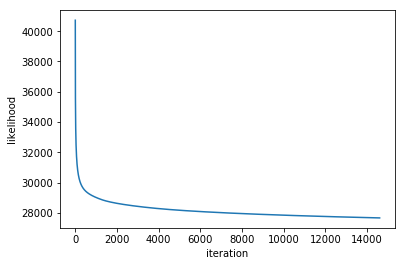

n_iter: 14650 , ||grad|| = 57.1067409265


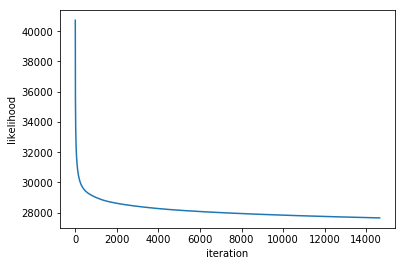

n_iter: 14700 , ||grad|| = 57.0041984021


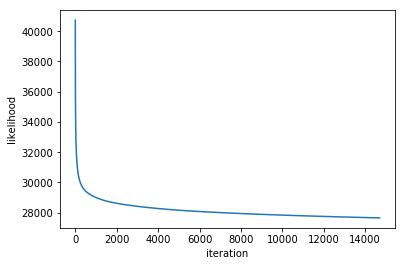

n_iter: 14750 , ||grad|| = 56.9020521527


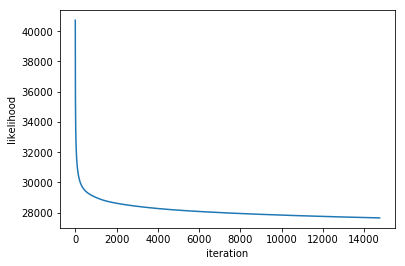

n_iter: 14800 , ||grad|| = 56.8003035586


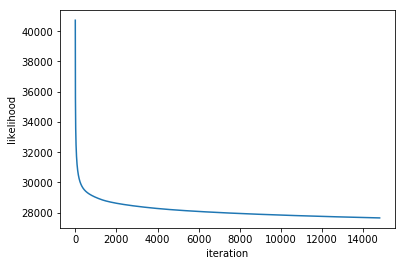

n_iter: 14850 , ||grad|| = 56.6989597201


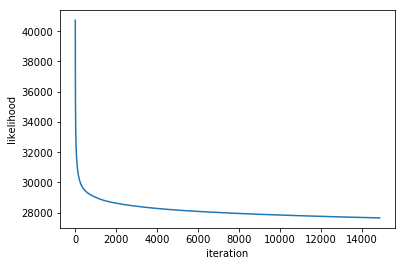

n_iter: 14900 , ||grad|| = 56.5980339825


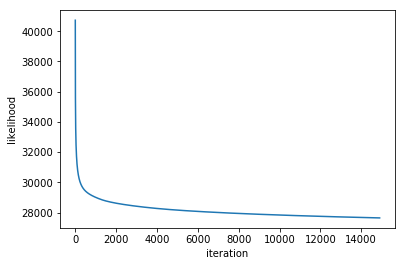

n_iter: 14950 , ||grad|| = 56.497544835


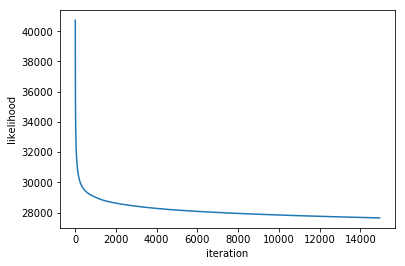

n_iter: 15000 , ||grad|| = 56.3975131593


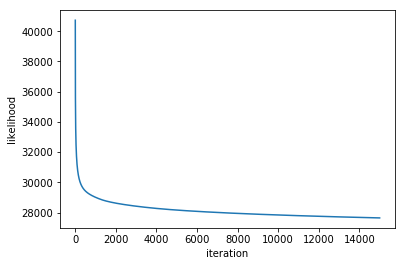

n_iter: 15050 , ||grad|| = 56.2979586728


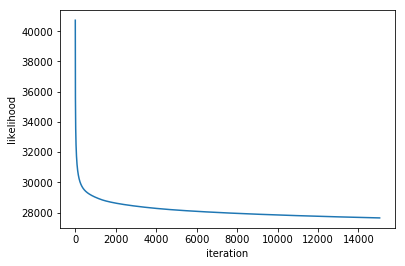

n_iter: 15100 , ||grad|| = 56.1988969048


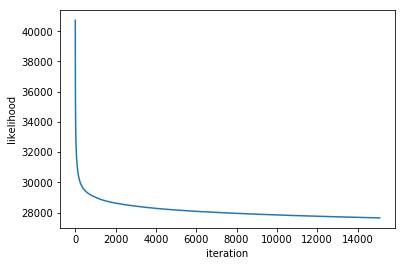

n_iter: 15150 , ||grad|| = 56.1003377409


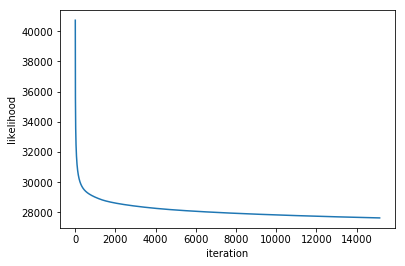

n_iter: 15200 , ||grad|| = 56.0022856927


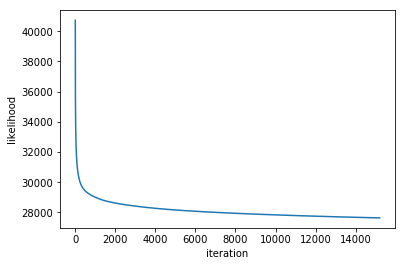

n_iter: 15250 , ||grad|| = 55.9047412932


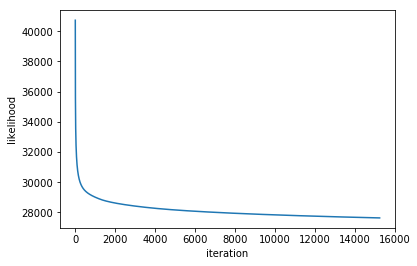

n_iter: 15300 , ||grad|| = 55.8077027991


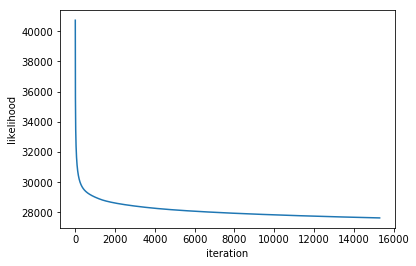

n_iter: 15350 , ||grad|| = 55.7111676229


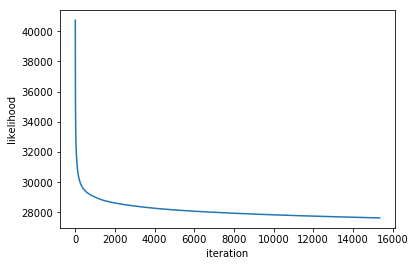

n_iter: 15400 , ||grad|| = 55.6151332798


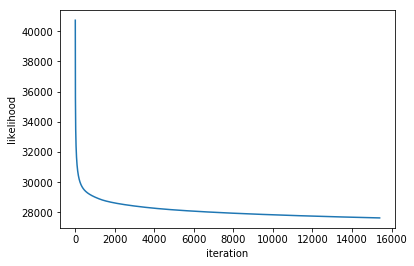

n_iter: 15450 , ||grad|| = 55.5195978836


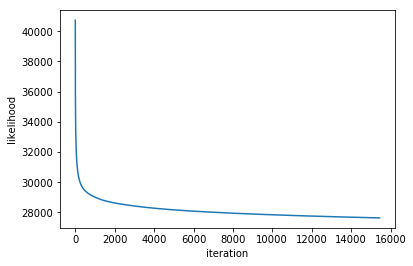

n_iter: 15500 , ||grad|| = 55.4245603275


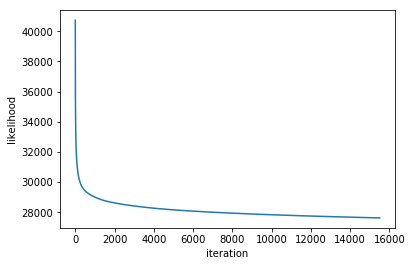

n_iter: 15550 , ||grad|| = 55.3300202841


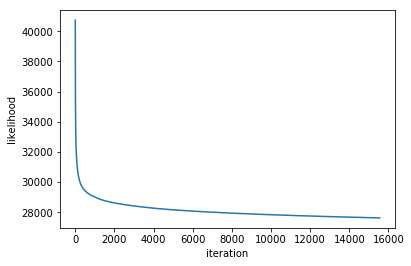

n_iter: 15600 , ||grad|| = 55.2359781207


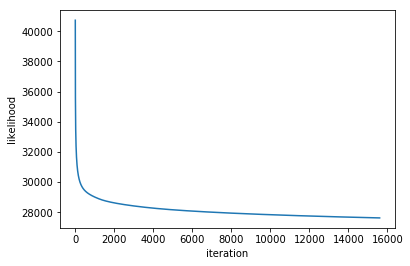

n_iter: 15650 , ||grad|| = 55.1424347896


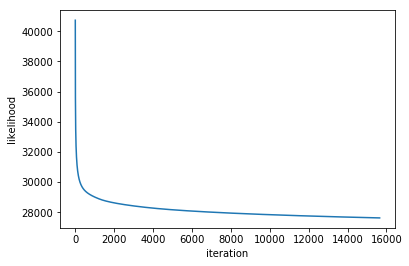

n_iter: 15700 , ||grad|| = 55.0493917205


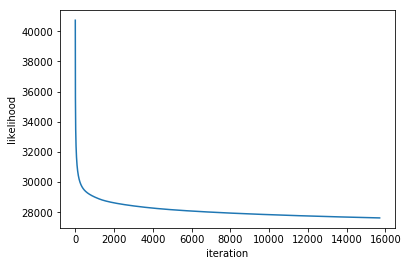

n_iter: 15750 , ||grad|| = 54.9568507291


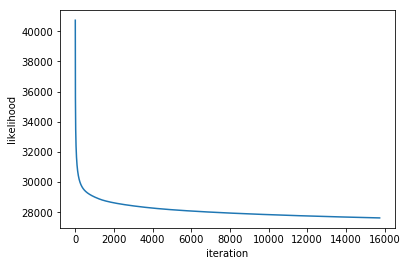

n_iter: 15800 , ||grad|| = 54.8648139414


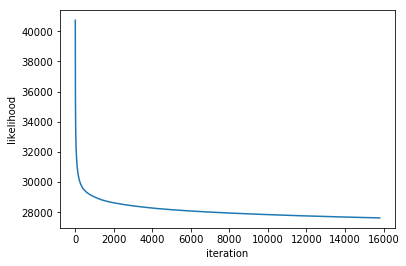

n_iter: 15850 , ||grad|| = 54.7732837355


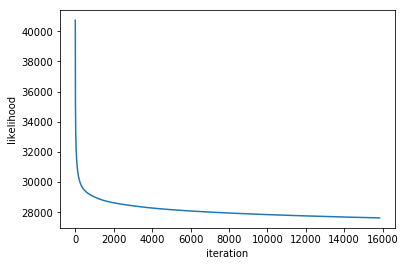

n_iter: 15900 , ||grad|| = 54.6822626951


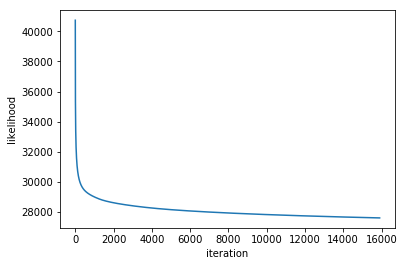

n_iter: 15950 , ||grad|| = 54.591753573


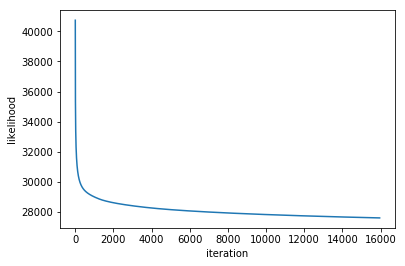

n_iter: 16000 , ||grad|| = 54.5017592613


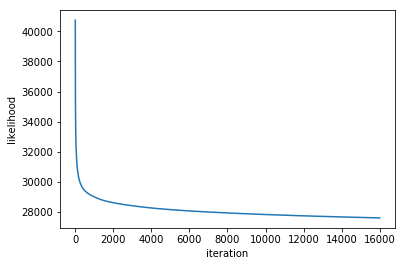

n_iter: 16050 , ||grad|| = 54.4122827664


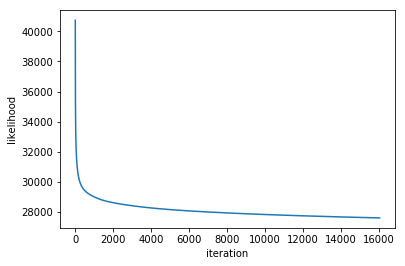

n_iter: 16100 , ||grad|| = 54.3233271854


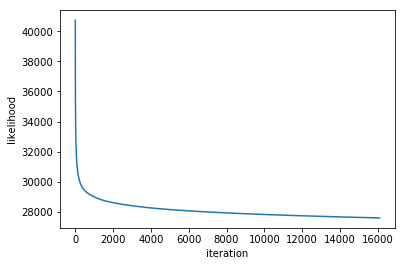

n_iter: 16150 , ||grad|| = 54.2348956836


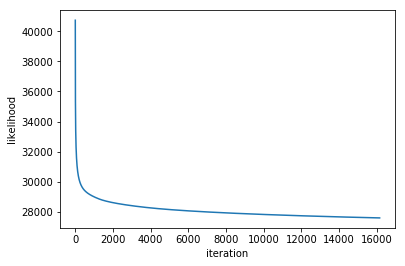

n_iter: 16200 , ||grad|| = 54.1469914713


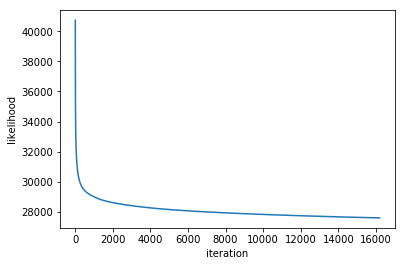

n_iter: 16250 , ||grad|| = 54.0596177771


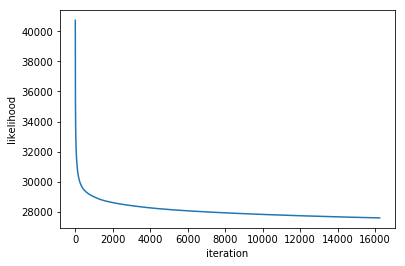

n_iter: 16300 , ||grad|| = 53.9727778183


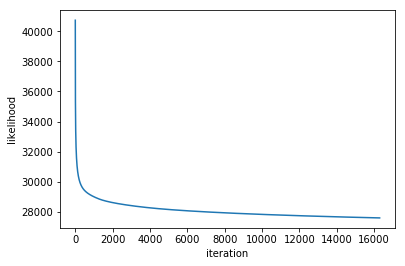

n_iter: 16350 , ||grad|| = 53.8864747638


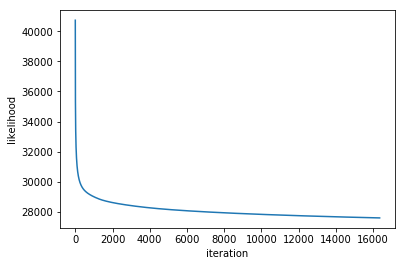

n_iter: 16400 , ||grad|| = 53.8007116901


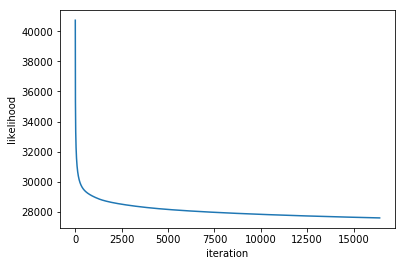

n_iter: 16450 , ||grad|| = 53.7154915258


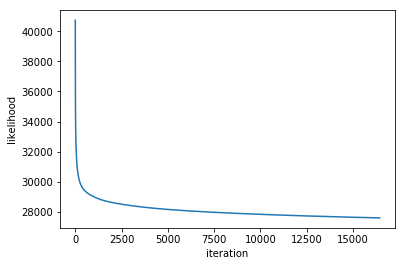

n_iter: 16500 , ||grad|| = 53.6308169821


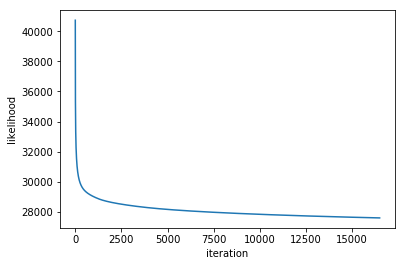

n_iter: 16550 , ||grad|| = 53.5466904652


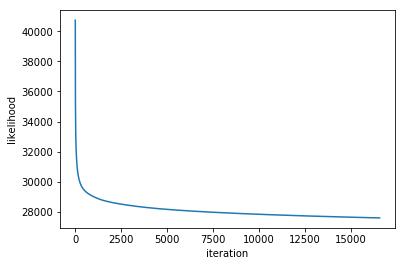

n_iter: 16600 , ||grad|| = 53.4631139647


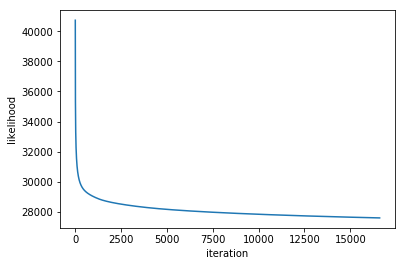

n_iter: 16650 , ||grad|| = 53.380088913


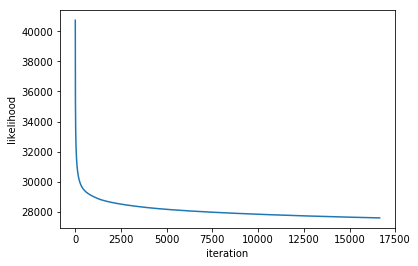

n_iter: 16700 , ||grad|| = 53.2976160047


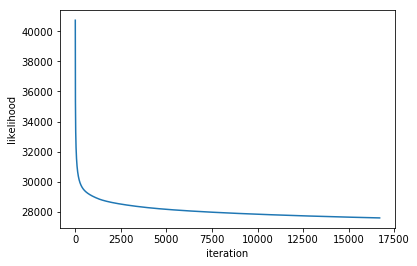

n_iter: 16750 , ||grad|| = 53.2156949691


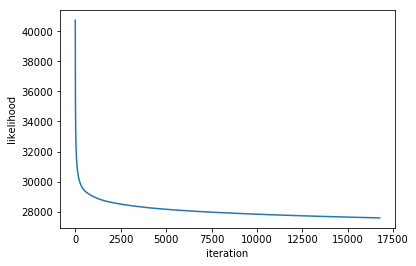

n_iter: 16800 , ||grad|| = 53.1343242784


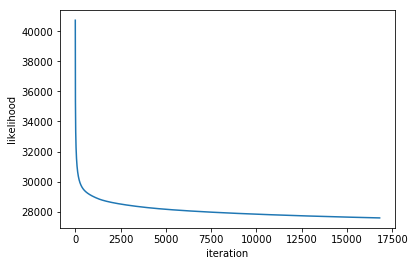

n_iter: 16850 , ||grad|| = 53.0535007794


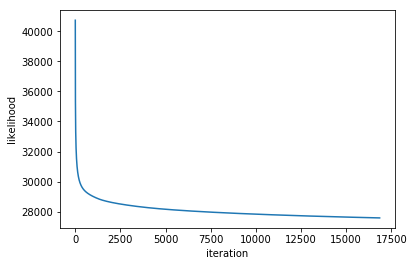

n_iter: 16900 , ||grad|| = 52.9732192252


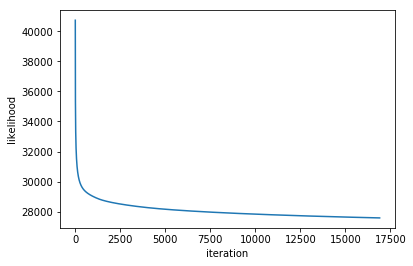

n_iter: 16950 , ||grad|| = 52.8934716833


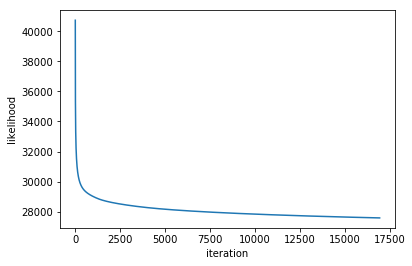

n_iter: 17000 , ||grad|| = 52.8142467909


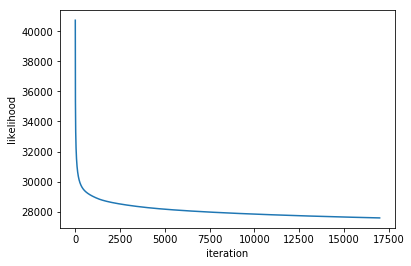

n_iter: 17050 , ||grad|| = 52.7355288206


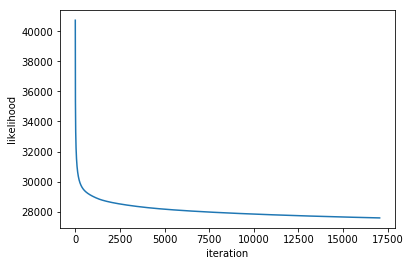

n_iter: 17100 , ||grad|| = 52.6572965181


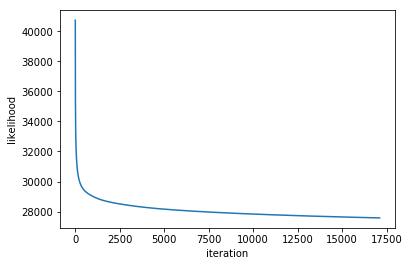

n_iter: 17150 , ||grad|| = 52.5795216677


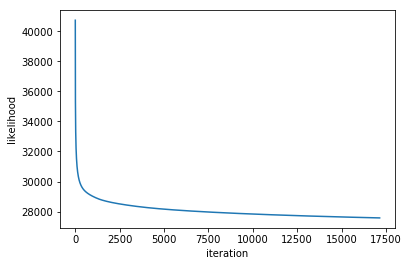

n_iter: 17200 , ||grad|| = 52.5021673426


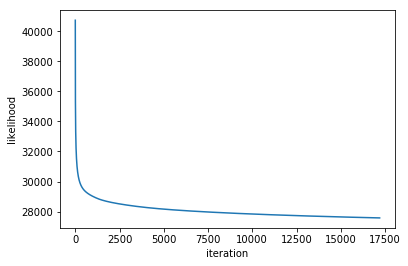

n_iter: 17250 , ||grad|| = 52.425185806


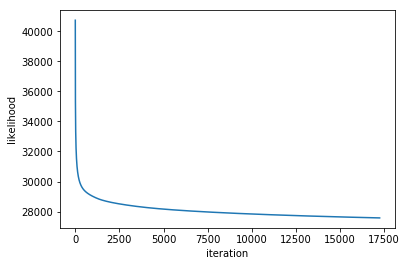

n_iter: 17300 , ||grad|| = 52.3485160459


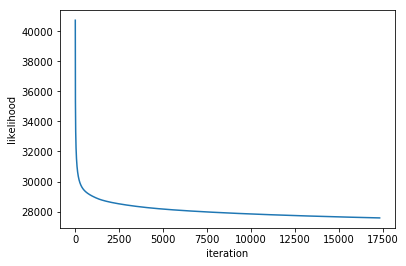

n_iter: 17350 , ||grad|| = 52.2720809696


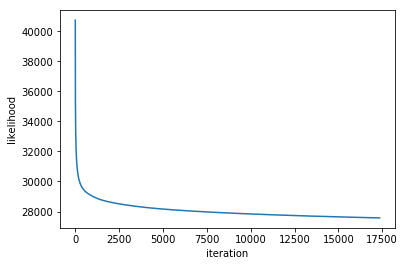

n_iter: 17400 , ||grad|| = 52.1957843546


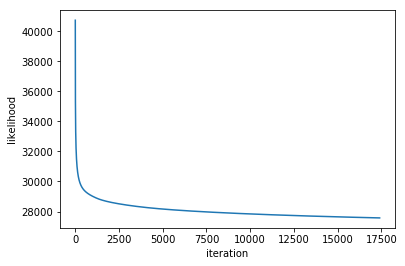

n_iter: 17450 , ||grad|| = 52.1195077654


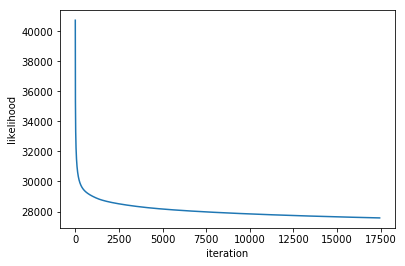

n_iter: 17500 , ||grad|| = 52.043107824


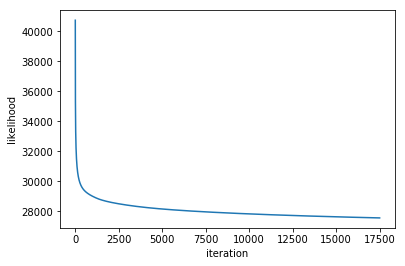

n_iter: 17550 , ||grad|| = 51.9664144519


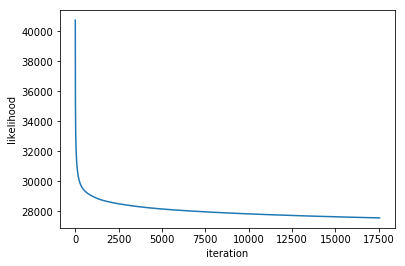

n_iter: 17600 , ||grad|| = 51.8892309971


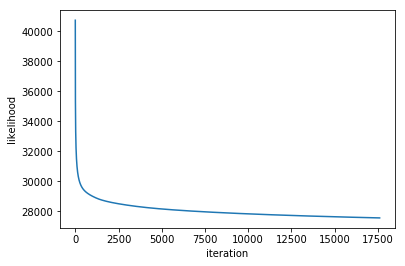

n_iter: 17650 , ||grad|| = 51.8113374415


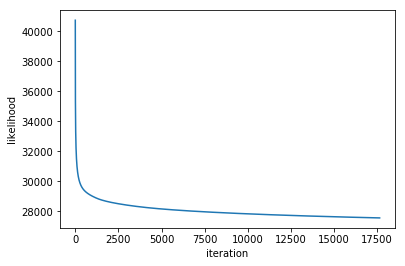

n_iter: 17700 , ||grad|| = 51.7324980598


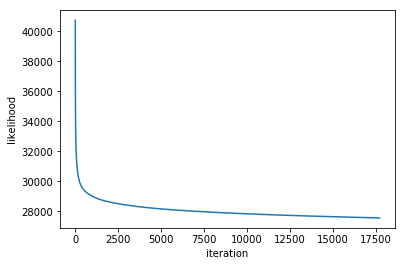

n_iter: 17750 , ||grad|| = 51.6524747564


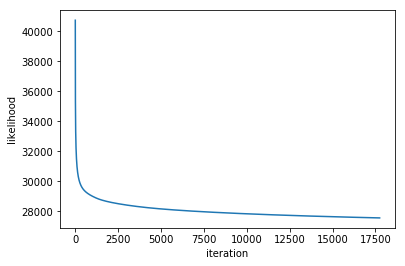

n_iter: 17800 , ||grad|| = 51.5710466052


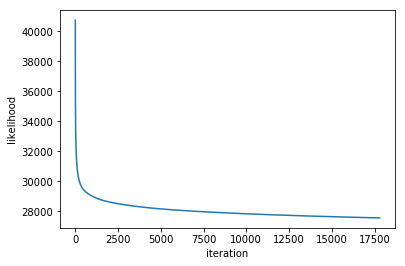

n_iter: 17850 , ||grad|| = 51.4880346572


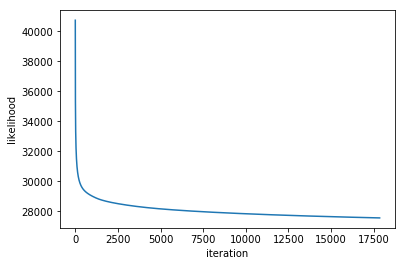

n_iter: 17900 , ||grad|| = 51.4033289464


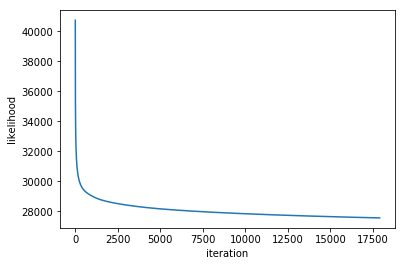

n_iter: 17950 , ||grad|| = 51.3169124078


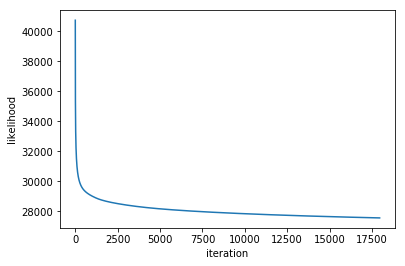

n_iter: 18000 , ||grad|| = 51.228875227


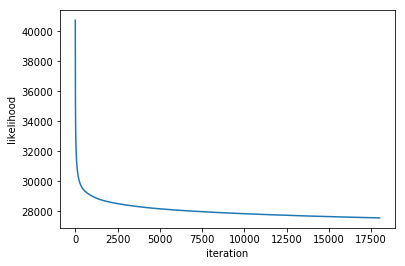

n_iter: 18050 , ||grad|| = 51.139414188


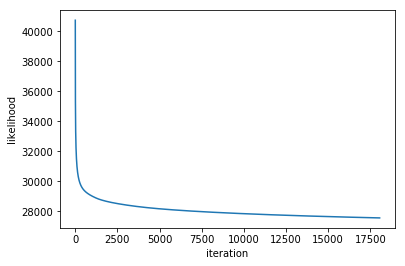

n_iter: 18100 , ||grad|| = 51.0488152268


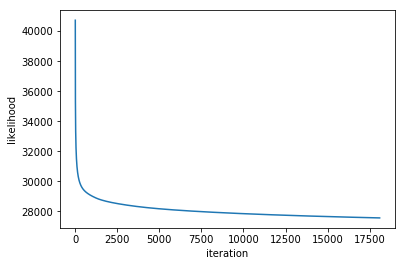

n_iter: 18150 , ||grad|| = 50.957422478


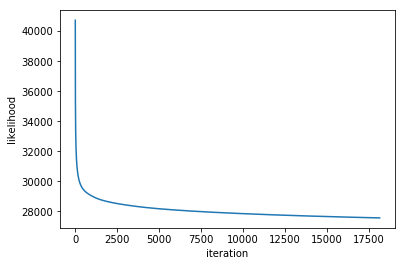

n_iter: 18200 , ||grad|| = 50.8656012591


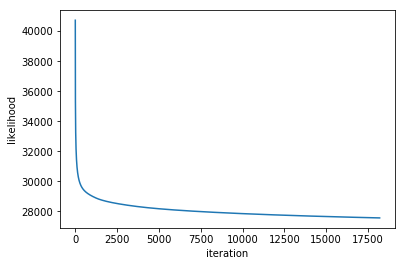

In [ ]:
# logistic regression
w_tot, loss_tot = logistic_regression(y, phi, arg_lr['initial_w'], arg_lr['max_iters'], arg_lr['gamma'], arg_lr['method_minimization'], arg_lr['threshold'], arg_lr['debug_mode'] )

In [8]:
plt.plot(loss_tot)

[41635.148169333828, 40044.171323127339, 39351.565175311276, 38965.969428997465, 38716.429332654872, 38537.997494581839, 38401.188725998443, 38290.822582920875, 38198.327139431254, 38118.514889747319, 38048.075188182265, 37984.804540436504, 37927.184860829162, 37874.138970126391, 37824.882321873796, 37778.829777432627, 37735.535237710734, 37694.65157322499, 37655.903453374347, 37619.068568942792, 37583.964427945619, 37550.438919433174, 37518.363466623756, 37487.627986599626, 37458.137128582755, 37429.807429509769, 37402.565136322359, 37376.344518903388, 37351.086548394793, 37326.737850701938, 37303.249869484171, 37280.578190239437, 37258.681989460019, 37237.523581771457, 37217.06804449085, 37197.2829038528, 37178.137870734383, 37159.604616404729, 37141.656580866133, 37124.268807915469, 37107.417802256525, 37091.08140492691, 37075.238684031603, 37059.869838347498, 37044.956111816231, 37030.47971730162, 37016.423768276218, 37002.772217331447, 36989.509800592699, 36976.621987271355, 36964